#**IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
# Importando as bibliotecas utilizadas e métodos ou atributos utilizados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from datetime import datetime
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

**IMPORTAÇÃO DOS DADOS EM CSV**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Memely

In [ ]:
# Atribuindo as planilhas a seu respectivo dataframe


df_demo = pd.read_excel('/content/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.xlsx')
df_hist = pd.read_excel('/content/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.xlsx')
df_peso = pd.read_excel('/content/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926 (1).xlsx')
df_tumor = pd.read_excel('/content/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.xlsx')


In [ ]:
# df_demo = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')
# df_hist = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
# df_peso = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
# df_tumor = pd.read_csv('/content/drive/MyDrive/COLAB COPIAS/testes projeto/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')

YUYU

In [ ]:
# # Atribuindo as planilhas a seu respectivo dataframe

# df_demo = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/Cópia de BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.xlsx')
# df_hist = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.xlsx')
# df_peso = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.xlsx')
# df_tumor = pd.read_excel('/content/drive/MyDrive/Inteli/Modulo_03/dataset/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.xlsx')

In [ ]:
df_hist.columns

#  'Ki67 (%)',#
#  'Ki67 (>14%)',#
#  'Grau histológico',#
#  'Código da Morfologia de acordo com o CID-O',#
#  'Código da Topografia (CID-O)'#

Index(['Record ID', 'Repeat Instrument', 'Repeat Instance',
       'Diagnostico primario (tipo histológico)', 'Grau histológico',
       'Subtipo tumoral', 'Receptor de estrogênio', 'Receptor de progesterona',
       'Ki67 (>14%)', 'Receptor de progesterona (quantificação %)',
       'Receptorde Estrogênio (quantificação %)',
       'Indice H (Receptorde progesterona)', 'HER2 por IHC', 'HER2 por FISH',
       'Ki67 (%)'],
      dtype='object')

In [ ]:
# Printando as colunas de df_tumor

for col in df_tumor.columns:
    print(col)

Record ID
Repeat Instrument
Repeat Instance
Data da primeira consulta institucional [dt_pci]
Data do diagnóstico
Código da Topografia (CID-O)
Código da Morfologia de acordo com o CID-O
Estadio Clínico  
Grupo de Estadio Clínico
Classificação TNM Clínico - T
Classificação TNM Clínico - N
Classificação TNM Clínico - M
Metastase ao DIAGNOSTICO - CID-O #1
Metastase ao DIAGNOSTICO - CID-O #2
Metastase ao DIAGNOSTICO - CID-O #3
Metastase ao DIAGNOSTICO - CID-O #4
Data do tratamento
Combinação dos Tratamentos Realizados no Hospital
Ano do diagnóstico
Lateralidade do tumor
Data de Recidiva
Tempo desde o diagnóstico até a primeira recidiva  
Local de Recidiva a  distancia/ metastase #1 - CID-O - Topografia
Local de Recidiva a  distancia/ metastase #2 - CID-O - Topografia
Local de Recidiva a  distancia/ metastase #3 - CID-O - Topografia
Local de Recidiva a  distancia/ metastase #4 - CID-O - Topografia
Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)
Descrição da Topografia 
Cla

In [ ]:
# Printando as colunas de df_demo

for col in df_demo.columns:
    print(col)

Record ID
Repeat Instrument
Repeat Instance
Escolaridade
Idade do paciente ao primeiro diagnóstico
Sexo
Raça declarada (Biobanco)
UF de nascimento do paciente
UF de residência do paciente
Data da última informação sobre o paciente
Última informação do paciente
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]
Já ficou grávida?
Quantas vezes ficou gráfida?
Número de partos
Idade na primeira gestação
Abortou
Amamentou na primeira gestação?
Por quanto tempo amamentou?
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)
Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 

**TEMPO DE SOREVIDA E TEMPO DE RECIDIVA**

In [ ]:
# Renomendo as colunas de seus determinados Data frame (df_tumor,df_demo)

df_demo.rename(columns = {'Data da última informação sobre o paciente':'Data_ult_inf'}, inplace = True)
df_tumor.rename(columns = {'Data do tratamento':'Data_do_tratamento', 'Data do diagnóstico':'Data_do_diagnóstico'}, inplace = True)

**SELEÇÃO PRIMÁRIA DE TABELAS**  

In [ ]:
# Após debate inicial do grupo, decidiu-se seguir com as seguintes colunas em cada dataframe

df_demo = df_demo[['Record ID', 'Escolaridade', 'Idade do paciente ao primeiro diagnóstico', 'Sexo', 'Data_ult_inf', 'Última informação do paciente', 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]', 'Já ficou grávida?', 'Idade na primeira gestação', 'Amamentou na primeira gestação?', 'Por quanto tempo amamentou?', 'Idade da primeira mentruação', 'Já fez uso de drogas?',	'Atividade Física',	'Consumo de tabaco',	'Consumo de álcool', 'Possui histórico familiar de câncer?', 'Regime de Tratamento']]


df_peso = df_peso[['Record ID','Peso', 'Altura (em centimetros)', 'IMC']]


df_tumor = df_tumor[['Record ID', 'Código da Topografia (CID-O)', 'Código da Morfologia de acordo com o CID-O', 'Estadio Clínico  ', 'Grupo de Estadio Clínico', 'Classificação TNM Clínico - T', 'Classificação TNM Clínico - N', 'Classificação TNM Clínico - M', 'Combinação dos Tratamentos Realizados no Hospital', 'Lateralidade do tumor', 'Tempo desde o diagnóstico até a primeira recidiva  ', 'Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)', 'Descrição da Topografia ', 'Com recidiva à distância', 'Com recidiva regional', 'Com recidiva local', 'Data_do_diagnóstico','Data_do_tratamento', 'Data de Recidiva']]


df_hist = df_hist.drop(columns='Indice H (Receptorde progesterona)')


***LIMPEZA DE LINHAS TOTALMENTE VAZIAS OU POBRES DE CONTEÚDO***

In [ ]:
#não foi necessário fazer esse processo com o df_demo

#A lógica utilizada foi manter nos dataframes apenas as linhas que tenham pelo menos uma célula não nula, eliminando as linhas vazias

df_tumor = df_tumor[df_tumor.isnull().sum(axis=1) < 14]

df_peso = df_peso[df_peso.isnull().sum(axis=1) < 3]

df_hist = df_hist[df_hist.isnull().sum(axis=1) < 10]

print(df_tumor.shape)
print(df_peso.shape)
print(df_hist.shape)
print(df_demo.shape)

(4677, 19)
(51334, 4)
(4787, 14)
(4272, 18)


**TRATAMENTO DA TABELA PESO PARA EVITAR REPETIÇÕES // TRATAMENTO DE OUTLIERS**


In [ ]:
#SETANDO O NUMERO DE CASAS DECIMAIS

pd.set_option('display.precision',1)

menores = df_peso[(df_peso.IMC > 5)]
maiores = menores[(menores.IMC < 50)]


#Agrupando por ID e colocando a média 
df_peso = maiores[(maiores.IMC != np.inf)].groupby(['Record ID'], as_index=False).mean()


#**Fazendo o Agrupamento das tabelas**

In [ ]:
#Selecionando os 'Record ID'(pacientes) duplicados da tabela

df_tumor_dup = df_tumor[df_tumor.duplicated('Record ID') == True]

In [ ]:
#Lógica para pegar as informações de uma nova ocorrência da tabela de pacientes duplicado

df_tumor_agrup = df_tumor

#Atribuimos os valores das colunas do Data frame(df_tumor_agrup) a uma nova coluna.

df_tumor_agrup['Código da Topografia (CID-O)	2'] = df_tumor_agrup['Código da Topografia (CID-O)']
df_tumor_agrup['Estadio Clínico	2'] = df_tumor_agrup['Estadio Clínico  ']
df_tumor_agrup['Lateralidade do tumor	2'] = df_tumor_agrup['Lateralidade do tumor']
df_tumor_agrup['Data_do_tratamento 2'] = df_tumor_agrup['Data_do_tratamento']


indice_duplicadas = df_tumor_dup.index

for i in indice_duplicadas:

  #Adiciona na nova coluna o novo código da Topografia
  df_tumor_agrup.loc[i-1, 'Código da Topografia (CID-O)	2'] = df_tumor_agrup.loc[i, 'Código da Topografia (CID-O)']
  
  #Adiciona na nova coluna o novo Estadio Clínico
  df_tumor_agrup.loc[i-1, 'Estadio Clínico	2'] = df_tumor_agrup.loc[i, 'Estadio Clínico  ']
  
  #Adiciona na nova coluna o novo Estadio Clínico
  df_tumor_agrup.loc[i-1, 'Lateralidade do tumor	2'] = df_tumor_agrup.loc[i, 'Lateralidade do tumor']
  
  #Sobrescrevendo a informação de ter recidiva ou não com base na última linha
  df_tumor_agrup.loc[i-1, 'Com recidiva local'] = df_tumor_agrup.loc[i, 'Com recidiva local']
  df_tumor_agrup.loc[i-1, 'Com recidiva regional'] = df_tumor_agrup.loc[i, 'Com recidiva regional']
  df_tumor_agrup.loc[i-1, 'Com recidiva à distância'] = df_tumor_agrup.loc[i, 'Com recidiva à distância']
  
  #Adiciona na nova coluna o novo Estadio Clínico
  df_tumor_agrup.loc[i-1, 'Data_do_tratamento 2'] = df_tumor_agrup.loc[i, 'Data_do_tratamento']


In [ ]:
#Função para criar uma coluna que indique a repetição da linha

df_tumor_agrup['Repeat'] = 0


for i in df_tumor_dup.index:
  if(df_tumor_agrup.loc[i, 'Record ID'] == df_tumor_agrup.loc[i-1, 'Record ID']):
    df_tumor_agrup.loc[i, 'Repeat'] = df_tumor_agrup.loc[i-1, 'Repeat'] + 1


RETIRANDO LINHAS COM MAIS DE UMA OCORRÊNCIA, **MANTENDO O ÚLTIMO REGISTRO**

In [ ]:
#Aqui utilizou-se o comando drop_duplicates com o parâmetro keep = last
#de forma que o dataframe retire todas as linhas que tenham o mesmo Record ID
#mantendo apenas a última linha na tabela, a fim de manter o agrupamento

df_tumor = df_tumor.drop_duplicates()

print(df_peso['Record ID'].nunique())
print(df_hist['Record ID'].nunique())
print(df_tumor['Record ID'].nunique())
print(df_demo['Record ID'].nunique())

print('-----------------')

print(df_peso['Record ID'].value_counts().sum())
print(df_hist['Record ID'].value_counts().sum())
print(df_tumor['Record ID'].value_counts().sum())
print(df_demo['Record ID'].value_counts().sum())

3746
4272
4272
4272
-----------------
3746
4787
4677
4272


**MERGE DAS TABELAS**

In [ ]:
#Fazendo a junção das tabelas com o comando merge()

df_merge = df_demo.merge(df_tumor)
df_merge = df_merge.merge(df_hist)
df_merge = df_merge.merge(df_peso)

df_dados = df_merge

# Verificando se há valores nulos no merge das tabelas(df_dados)

df_dados.isnull().sum()

Record ID                                                                                           0
Escolaridade                                                                                      238
Idade do paciente ao primeiro diagnóstico                                                         195
Sexo                                                                                              162
Data_ult_inf                                                                                        2
Última informação do paciente                                                                       2
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]       2
Já ficou grávida?                                                                                3452
Idade na primeira gestação                                                                       3611
Amamentou na primeira gestação?                                                   

CRIAÇÃO DA COLUNA DE DURAÇÃO DE TRATAMENTO/ TEMPO SOBREVIDA

In [ ]:
# Convertendo a coluna "Data_ult_inf" e 'Data_do_diagnóstico2' em objetos de data e hora

df_dados['Data_ult_inf2'] = pd.to_datetime(df_dados['Data_ult_inf'])
df_dados['Data_do_diagnóstico2'] = pd.to_datetime(df_dados['Data_do_diagnóstico'])

# Excluindo valores nulos da coluna 'Data_ult_inf2'

df_dados.dropna(subset=['Data_ult_inf2'])

# Fazendo a subtração da ultima data que o paciente foi a clinica com a primeira.


df_dados['Duração_do_Tratamento'] = df_dados['Data_ult_inf2'] - df_dados['Data_do_diagnóstico2']

df_dados[['Duração_do_Tratamento','Data_ult_inf2','Data_do_diagnóstico2']]


,Duração_do_Tratamento,Data_ult_inf2,Data_do_diagnóstico2
0,2225 days,2014-04-26,2008-03-23
1,3294 days,2016-11-17,2007-11-11
2,4153 days,2019-05-02,2007-12-18
3,1331 days,2011-09-29,2008-02-06
4,1331 days,2011-09-29,2008-02-06
...,...,...,...
4657,138 days,2021-01-21,2020-09-05
4658,138 days,2021-01-21,2020-09-05
4659,900 days,2022-06-10,2019-12-23
4660,538 days,2022-04-29,2020-11-07


In [ ]:
#Transformando as datas da coluna 'Duração_do_Tratamento' em dias e atribuindo a mesma

df_dados['Duração_do_Tratamento'] = df_dados['Duração_do_Tratamento'].dt.days



###**SELEÇÃO DE COLUNAS ESPECÍFICAS PARA TRABALHAR**

In [ ]:
#Após discussão da equipe, com base nos materiais que nos foram fornecidos para estudo do problema
#usando guidelines, entrevistas e artigos como referência
#decidimos utilizar as seguintes colunas no nosso modelo

dfz = df_dados[['Record ID', 'Duração_do_Tratamento', 'Idade do paciente ao primeiro diagnóstico', 'Receptor de progesterona', 'Receptor de estrogênio', 'Última informação do paciente', 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]', 'Regime de Tratamento', 'Classificação TNM Clínico - M', 'Classificação TNM Clínico - N', 'Classificação TNM Clínico - T', 'Lateralidade do tumor', 'Com recidiva à distância', 'Com recidiva regional', 'Com recidiva local', 'Estadio Clínico  ', 'Combinação dos Tratamentos Realizados no Hospital','Subtipo tumoral', 'Data de Recidiva', 'Data_do_tratamento']]
for coluna in dfz:
  print(f"{df_dados[coluna].unique(),coluna}---")



(array([  302,   710,   752, ..., 82131, 82205, 82240]), 'Record ID')---
(array([2225., 3294., 4153., ...,  391.,  366.,  138.]), 'Duração_do_Tratamento')---
(array([51., 58., 56., 63., 42., 43., 52., 40., 60., 29., 36., 75., 45.,
       31., 30., 71., 48., 50., 39., 49., 61., 47., 55., 74., 37., 59.,
       32., 64., 44., 35., 57., 62., 54., 68., 33., 78., 27., 28., 46.,
       69., 80., 34., 82., 70., 41., 65., 73., 53., 72., 22., 66., 26.,
       38., 81., 79., 25., 24., 83., 86., 67., 84., 91., 76., 77., 89.,
       85., 87., 92., 23., 90., 95., 88., 98., nan, 96.]), 'Idade do paciente ao primeiro diagnóstico')---
(array(['positivo', 'negativo', nan, 'inconclusivo', 'não realizado'],
      dtype=object), 'Receptor de progesterona')---
(array(['positivo', nan, 'negativo', 'não realizado'], dtype=object), 'Receptor de estrogênio')---
(array(['Obito por câncer', 'Vivo, SOE', 'Vivo, com câncer',
       'Óbito por outras causas, SOE', nan], dtype=object), 'Última informação do paciente'

#**Tratamento de missings das colunas selecionadas**

In [ ]:
#SETANDO O NUMERO DE CASAS DECIMAIS
pd.set_option('display.precision',0)

#Cria-se duas variações do dataframe utilizado
#Sendo elas respectivamente para fazer a codificação e normalização da coluna e retirar os outliers, afim de que a média calculada seja realista
tes = dfz.dropna(subset=['Última informação do paciente'])
tes2 = dfz.dropna(subset=['Última informação do paciente'])


tes2['Idade do paciente ao primeiro diagnóstico'].fillna(tes['Idade do paciente ao primeiro diagnóstico'].describe()['mean'], inplace= True)

#Aqui escolhemos substituir a idade com média temporariamente para poder fazer a analise dos dados e depois modificamos novamente para "0", para facilitar o reconhecimento de dados ausentes na hora da codificação

tes2['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)
tes['Idade do paciente ao primeiro diagnóstico'].fillna("0", inplace= True)
tes['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)

#Consideramos que os pacientes que ainda não fizeram quimioterapia é que já fizeram cirurgia e irão fazer quimio depois, processo
#semelhante ao tratamento adjuvante

tes.loc[tes['Regime de Tratamento'] == 'Não fez quimioterapia'] = tes.loc[tes['Regime de Tratamento'] == 'Não fez quimioterapia'].replace('Não fez quimioterapia','Terapia Adjuvante')

#EMBORA TENHA SIDO UTILIZADO DF2 PARA ANALISES, A CONTINUIDADE DO CÓDIGO SE DARÁ COM O DF1 PORQUE ELE ESTÁ COM A IDADE ADAPTADA PARA SER CODIFICADA

<ipython-input-223-cc0d3f476738>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2['Idade do paciente ao primeiro diagnóstico'].fillna(tes['Idade do paciente ao primeiro diagnóstico'].describe()['mean'], inplace= True)
<ipython-input-223-cc0d3f476738>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)
<ipython-input-223-cc0d3f476738>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

**TRATAMENTO DE ALGUNS OUTLIERS DAS COLUNAS SELECIONADAS**

In [ ]:
#ELIMINANDO PACIENTES ACIMA DE 90 ANOS PORQUE POSSUIMOS POUCAS AMOSTRAGENS ACIMA DESSA FAIXA ETÁRIA E PARA EVITAR UNDERFITTING
index_idade = tes2[ (tes2['Idade do paciente ao primeiro diagnóstico'] >= 90)].index
tes2.drop(index_idade, inplace = True)
tes.drop(index_idade, inplace = True)

#ELIMINANDO PACIENTES QUE POSSUEM REGISTRO DE TUMOR ABAIXO DE 20 DIAS PORQUE ISSO É MUITO POUCO E PROVAVELMENTE A DATA ESTÁ BUGADA
index_diastumor = tes2[ (tes2['Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]'] <= 20)].index
tes2.drop(index_diastumor, inplace = True)
tes.drop(index_diastumor, inplace = True)

#ELIMINANDO PACIENTES COM REGIME DE TRATAMENTO PALIATIVO
index_paliativo = tes2[ (tes2['Regime de Tratamento'] == 'Paliativo')].index
tes2.drop(index_paliativo, inplace = True)
tes.drop(index_paliativo, inplace = True)

#ELIMINANDO PACIENTES COM REGIME DE TRATAMENTO NÃO INFORMADO
index_tratNI = tes2[ (tes2['Regime de Tratamento'] == 'Não Informado Tratamento')].index
tes2.drop(index_tratNI, inplace = True)
tes.drop(index_tratNI, inplace = True)

<ipython-input-224-4f19a7b063c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2.drop(index_idade, inplace = True)
<ipython-input-224-4f19a7b063c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.drop(index_idade, inplace = True)
<ipython-input-224-4f19a7b063c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2.drop(index_diastumor, inplace = True)
<ipython-input-224-4f19a7b063c2>:9: SettingWithCopyWarning: 
A value is t

In [ ]:
lista_i_estadio = tes.index

# A função cria variaveis catecoricas para gerar uma ordem/peso na intesidade do tumor(0,1,2,3,4).

def funcao_estadio(df,i):
  if ((tes.loc[i,'Estadio Clínico  '] == 'IIA') or (tes.loc[i,'Estadio Clínico  '] == 'IIB') or (tes.loc[i,'Estadio Clínico  '] == 'II')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 2
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IA') or (tes.loc[i,'Estadio Clínico  '] == 'IB') or (tes.loc[i,'Estadio Clínico  '] == 'I') or (tes.loc[i,'Estadio Clínico  '] == 'IB1') or (tes.loc[i,'Estadio Clínico  '] == 'IB2')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 1
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IIIA') or (tes.loc[i,'Estadio Clínico  '] == 'IIIB') or (tes.loc[i,'Estadio Clínico  '] == 'III') or (tes.loc[i,'Estadio Clínico  '] == 'IIIC')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 3
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IV') or (tes.loc[i,'Estadio Clínico  '] == 'IVA') or (tes.loc[i,'Estadio Clínico  '] == 'IVB') or (tes.loc[i,'Estadio Clínico  '] == 'IVC')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 4
  elif ((tes.loc[i,'Estadio Clínico  '] == 'X: não foi possível determinar') or (tes.loc[i,'Estadio Clínico  '] == 'Y: NA') or (tes.loc[i,'Estadio Clínico  '] == '0')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 0


for i in lista_i_estadio:
  tes.loc[i, 'Intensidade do tumor'] = funcao_estadio(tes, i)


tes[['Estadio Clínico  ','Intensidade do tumor']]


# A função cria variaveis catecoricas para gerar uma ordem/peso no tamanho do tumor(0,1,2,3,4).

def funcao_estadio_tamanho(df,i):
  if ((tes.loc[i,'Estadio Clínico  '] == 'IIA') or (tes.loc[i,'Estadio Clínico  '] == 'IA') or (tes.loc[i,'Estadio Clínico  '] == 'IIIA') or (tes.loc[i,'Estadio Clínico  '] == 'IVA')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 1
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IB') or (tes.loc[i,'Estadio Clínico  '] == 'IIB') or (tes.loc[i,'Estadio Clínico  '] == 'IIIB') or (tes.loc[i,'Estadio Clínico  '] == 'IB1') or (tes.loc[i,'Estadio Clínico  '] == 'IB2') or (tes.loc[i,'Estadio Clínico  '] == 'IVB')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 2
  elif ((tes.loc[i,'Estadio Clínico  '] == 'IIIC') or (tes.loc[i,'Estadio Clínico  '] == 'IIC') or (tes.loc[i,'Estadio Clínico  '] == 'IC') or (tes.loc[i,'Estadio Clínico  '] == 'IVC')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 3
  elif ((tes.loc[i,'Estadio Clínico  '] == 'I') or (tes.loc[i,'Estadio Clínico  '] == 'II') or (tes.loc[i,'Estadio Clínico  '] == 'III') or (tes.loc[i,'Estadio Clínico  '] == 'IV') or (tes.loc[i,'Estadio Clínico  '] == 'X: não foi possível determinar') or (tes.loc[i,'Estadio Clínico  '] == 'Y: NA') or (tes.loc[i,'Estadio Clínico  '] == '0')):
    print((tes.loc[i,'Estadio Clínico  ']))
    return 0



for i in lista_i_estadio:
  tes.loc[i, 'Tamanho do tumor'] = funcao_estadio_tamanho(tes, i)

# A função cria variaveis catecoricas na coluna 'TMN T INTENSIDADE' para gerar uma ordem/peso(0,1,2,3,4).


def funcao_tnm_t_numero(df,i):
  if ((tes.loc[i,'Classificação TNM Clínico - T'] == '1A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1C')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 1
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '2A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 2
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '3A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 3
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '4A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 4
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == 'X - nao foi possivel determinar') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'Y: Na') or (tes.loc[i,'Classificação TNM Clínico - T'] == '0') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'IS' or (tes.loc[i,'Classificação TNM Clínico - T'] == 'CDIS'))):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 0



for i in lista_i_estadio:
  tes.loc[i, 'TNM T Intensidade'] = funcao_tnm_t_numero(tes, i)

# A função cria variaveis catecoricas na coluna 'TMN T TAMANHO' para gerar uma ordem/peso(0,1,2,3,4).

def funcao_tnm_t_letra(df,i):
  if ((tes.loc[i,'Classificação TNM Clínico - T'] == '1A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3A') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4A')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 1
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '1B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3B') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4B')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 2
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '1C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3C') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4C')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 3
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == '1D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3D') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4D')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 4
  elif ((tes.loc[i,'Classificação TNM Clínico - T'] == 'X - nao foi possivel determinar') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'Y: Na') or (tes.loc[i,'Classificação TNM Clínico - T'] == '0') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'IS') or (tes.loc[i,'Classificação TNM Clínico - T'] == 'CDIS') or (tes.loc[i,'Classificação TNM Clínico - T'] == '1') or (tes.loc[i,'Classificação TNM Clínico - T'] == '2') or (tes.loc[i,'Classificação TNM Clínico - T'] == '3') or (tes.loc[i,'Classificação TNM Clínico - T'] == '4')):
    print((tes.loc[i,'Classificação TNM Clínico - T']))
    return 0



for i in lista_i_estadio:
  tes.loc[i, 'TNM T Tamanho'] = funcao_tnm_t_letra(tes, i)


tes[['TNM T Intensidade', 'TNM T Tamanho','Classificação TNM Clínico - T']]

IIIA
IIA
IIIA
I
IIB
IIA
IIA
IV
IIA
IIB
IA
IIA
IIIA
IB
IIB
IIB
IIB
IIIB
IIIB
IIA
I
IIIC
IIIB
IIA
IIIB
IIIA
IIA
I
I
IIA
IIA
X: não foi possível determinar
IIIA
III
I
IIA
IIA
IB
IIIA
IIIB
IIA
IIIB
IIIA
I
IIIA
IIB
I
IV
IIA
IV
IIA
IIA
IIIC
IIB
IIB
IIIC
IIIC
IIA
IV
IIIC
I
IIIC
IIA
IIIA
IIB
IIA
IIA
IIA
I
IIIC
IIIC
IIIC
IIIB
IIIB
IIB
IIB
IIA
IIIA
IIB
I
IIA
IIB
IIA
IIIB
IIA
IIIC
IIA
I
IIA
IIB
IIIA


<ipython-input-225-a9074dd32fe3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'Intensidade do tumor'] = funcao_estadio(tes, i)


IIIA
IIA
IIA
IIA
IIA
IIA
IIIB
IIB
IIIB
I
IIIA
IIA
IIA
IIA
IIIA
IIA
IIA
IIA
IIIA
I
IIIC
IIIA
IIB
IIIA
IIIB
IIIA
IIB
IA
IIB
IIIB
IIB
IIB
I
IV
I
I
I
I
IIIA
IIIA
IIIA
IIIA
III
IIA
IIB
IIIA
IV
IIIB
IIIA
IIB
IIIB
IIIA
IVA
I
IIIA
IIIA
IIB
IIIA
IIB
I
IIIA
IIIC
IV
IIIA
IIIA
IIIB
I
I
IIIB
IIIB
IIIA
IIA
IIA
IIIA
IIB
IIIA
IIIA
IIA
IIIA
IIIB
IIA
IIIA
I
IIIA
IIIA
IIA
IIB
IIB
IIIB
IIIB
IIIB
IIIB
IIB
IIB
IIIC
IIIA
IIB
IIB
IIA
IIB
IIB
IIIA
IIIA
IIB
IIIC
IIIC
IIIA
IIIA
IIIA
IIIA
IIIA
IIB
IIB
IV
IIIB
IIIA
IIIB
IIIA
IIB
IIIA
IV
IV
IIIB
I
IIB
IIIA
IIA
IIA
IIIA
IIA
IIIA
IIIA
IIIA
IA
IIIA
I
IIA
IIB
IIIA
IIIA
IIIA
IIIA
IIIA
IIIA
IIB
IIIA
IIA
IIA
IIA
IIA
IIIA
IV
IV
IIIB
IIIB
IIIA
IIIA
IIA
IIB
IIB
IIIB
IIIB
IIIA
IIA
IIA
IIB
IIIB
IIA
IIIA
IIIA
IIIA
IIIC
IIIC
IIA
IIIB
IIIB
IIIA
IIIC
IIB
IIA
III
IIIA
IIIA
IIIA
IIIA
I
IV
IIIC
IIIA
IIA
IIA
IIA
IIIB
IIIA
I
IIB
IIB
IIIB
IIIB
IIIB
IIB
IIIA
IIB
IIIC
I
IIIA
IIIA
IIB
IIB
I
IIB
IIIA
IV
IIB
IIIA
IIIB
IIB
IIB
IIB
IIIB
IIIB
IIIC
IV
IV
IIA
IIB
IIB
I
IIIA
IIIA
IIIB
IIIA
IIA
IB


<ipython-input-225-a9074dd32fe3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'Tamanho do tumor'] = funcao_estadio_tamanho(tes, i)



IIB
IIIB
IIIB
IIIB
IIIB
IIB
IIB
IIIC
IIIA
IIB
IIB
IIA
IIB
IIB
IIIA
IIIA
IIB
IIIC
IIIC
IIIA
IIIA
IIIA
IIIA
IIIA
IIB
IIB
IV
IIIB
IIIA
IIIB
IIIA
IIB
IIIA
IV
IV
IIIB
I
IIB
IIIA
IIA
IIA
IIIA
IIA
IIIA
IIIA
IIIA
IA
IIIA
I
IIA
IIB
IIIA
IIIA
IIIA
IIIA
IIIA
IIIA
IIB
IIIA
IIA
IIA
IIA
IIA
IIIA
IV
IV
IIIB
IIIB
IIIA
IIIA
IIA
IIB
IIB
IIIB
IIIB
IIIA
IIA
IIA
IIB
IIIB
IIA
IIIA
IIIA
IIIA
IIIC
IIIC
IIA
IIIB
IIIB
IIIA
IIIC
IIB
IIA
III
IIIA
IIIA
IIIA
IIIA
I
IV
IIIC
IIIA
IIA
IIA
IIA
IIIB
IIIA
I
IIB
IIB
IIIB
IIIB
IIIB
IIB
IIIA
IIB
IIIC
I
IIIA
IIIA
IIB
IIB
I
IIB
IIIA
IV
IIB
IIIA
IIIB
IIB
IIB
IIB
IIIB
IIIB
IIIC
IV
IV
IIA
IIB
IIB
I
IIIA
IIIA
IIIB
IIIA
IIA
IB
IIIB
IIB
IIB
IIIC
IIIA
IIIB
I
IIIB
IIIA
IIA
IIA
IIIA
IIIB
I
IIA
IIIB
IIIB
IIIC
IIIC
IIIA
IIIB
IIIB
IIB
IV
IIA
IIB
IIB
IIIA
IIIB
IV
IIB
IIB
IIIB
IIB
IIA
IV
IIB
IIIC
IIIA
IIIB
IIB
IIB
IIB
IIB
IIA
IIA
IV
IIIB
IV
IIIB
IIA
I
IIIA
IIIA
IIIA
IIB
IIIB
IIIA
IIB
IIB
IIIB
IIB
IIB
IIB
IIA
IIA
IIB
IIB
IIIC
IIA
I
IIIA
IIIA
I
I
IIB
IIB
IIA
I
I
IV
IIB
III
IV
IIIA
IV
IIB
II

<ipython-input-225-a9074dd32fe3>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'TNM T Intensidade'] = funcao_tnm_t_numero(tes, i)


1B
1C
IS
4B
4B
1C
1B
4B
4B
4D
1C
1A
4B
4B
4B
4B
4B
1A
1A
1C
1C
1C
1C
1C
4B
1C
1C
1C
1B
1C
1C
4C
IS
1C
1C
X - nao foi possivel determinar
4B
2B
1B
1C
1C
1C
1C
1C
4B
1C
4B
1C
1B
4B
1C
IS
4B
1A
1A
1A
CDIS
CDIS
CDIS
4C
1C
1B
4B
4D
4D
1B
IS
4B
4B
4B
4B
1C
1C
4B
4B
1C
1B
1B
4C
4A
1C
4B
4B
1C
1C
IS
1C
4B
1C
1C
1C
1C
1C
4B
4B
4B
1C
1C
1C
1C
3A
4B
CDIS
4B
1C
1A
1A
1B
2A
1C
4D
4D
1C
1C
1C
Y: Na
Y: Na
1C
1C
1C
4B
1B
X - nao foi possivel determinar
CDIS
4B
IS
1A
1C
4D
4B
4B
1C
1C
1B
1C
4B
4B
1C
1C
4C
1B
4B
1C
4D
4D
4D
4D
4D
1C
1C
4B
4D
1C
1C
4D
1C
1C
1B
1B
4B
1C
1A
1B
1B
1B
4A
4B
4B
1A
4D
4B
4D
CDIS
4B
1C
4B
1C
1C
1C
1C
1C
CDIS
4B
X - nao foi possivel determinar
1C
4B
1A
1A
1C
1C
1C
1C
1B
4D
4D
4B
Y: Na
4B
4B
4B
CDIS
4B
1C
4B
4B
1C
CDIS
4D
4B
1C
4B
1C
1C
1C
4B
1C
1B
4A
4B
1C
4B
1C
1C
1C
1C
1C
4B
4D
1C
4D
1C
1B
4B
4B
4B
4B
1C
4B
1A
4B
4B
1C
3B
4B
1C
1C
1C
4D
1C
1B
1B
1C
1C
4B
4B
1C
4B
4B
1C
1B
1B
4C
1C
1C
4B
1C
4B
1C
4B
4B
4B
4B
4B
1C
1C
4D
1C
1C
1C
1C
1C
1C
4B
4B
4D
4D
Y: Na
4B
4D
1C
4B
1C
1C
4B
4

<ipython-input-225-a9074dd32fe3>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.loc[i, 'TNM T Tamanho'] = funcao_tnm_t_letra(tes, i)


4B
4B
4B
4B
4B
1A
1A
1C
1C
1C
1C
1C
4B
1C
1C
1C
1B
1C
1C
4C
IS
1C
1C
X - nao foi possivel determinar
4B
2B
1B
1C
1C
1C
1C
1C
4B
1C
4B
1C
1B
4B
1C
IS
4B
1A
1A
1A
CDIS
CDIS
CDIS
4C
1C
1B
4B
4D
4D
1B
IS
4B
4B
4B
4B
1C
1C
4B
4B
1C
1B
1B
4C
4A
1C
4B
4B
1C
1C
IS
1C
4B
1C
1C
1C
1C
1C
4B
4B
4B
1C
1C
1C
1C
3A
4B
CDIS
4B
1C
1A
1A
1B
2A
1C
4D
4D
1C
1C
1C
Y: Na
Y: Na
1C
1C
1C
4B
1B
X - nao foi possivel determinar
CDIS
4B
IS
1A
1C
4D
4B
4B
1C
1C
1B
1C
4B
4B
1C
1C
4C
1B
4B
1C
4D
4D
4D
4D
4D
1C
1C
4B
4D
1C
1C
4D
1C
1C
1B
1B
4B
1C
1A
1B
1B
1B
4A
4B
4B
1A
4D
4B
4D
CDIS
4B
1C
4B
1C
1C
1C
1C
1C
CDIS
4B
X - nao foi possivel determinar
1C
4B
1A
1A
1C
1C
1C
1C
1B
4D
4D
4B
Y: Na
4B
4B
4B
CDIS
4B
1C
4B
4B
1C
CDIS
4D
4B
1C
4B
1C
1C
1C
4B
1C
1B
4A
4B
1C
4B
1C
1C
1C
1C
1C
4B
4D
1C
4D
1C
1B
4B
4B
4B
4B
1C
4B
1A
4B
4B
1C
3B
4B
1C
1C
1C
4D
1C
1B
1B
1C
1C
4B
4B
1C
4B
4B
1C
1B
1B
4C
1C
1C
4B
1C
4B
1C
4B
4B
4B
4B
4B
1C
1C
4D
1C
1C
1C
1C
1C
1C
4B
4B
4D
4D
Y: Na
4B
4D
1C
4B
1C
1C
4B
4B
4B
4B
1C
1C
1C
4D
4B
4B
1C
1C
1C
1

,TNM T Intensidade,TNM T Tamanho,Classificação TNM Clínico - T
1,NaN,NaN,3
6,NaN,NaN,1
10,NaN,NaN,3
16,NaN,NaN,1
29,NaN,NaN,2
...,...,...,...
4652,NaN,NaN,2
4653,NaN,NaN,3
4654,NaN,NaN,3
4655,NaN,NaN,2


## **Estatística Descritiva**

**RECONHECIMENTO DE COLUNAS NUMÉRICAS X COLUNAS CATEGÓRICAS**

In [ ]:
#Através do comando dtypes, identificamos quais são as tabelas categóricas e numéricas

cont = 0
listacolcat = []
for coluna in tes2.dtypes:
  if coluna == 'float64' or coluna == 'int64':
    tipo = "Coluna Númerica"

  elif coluna == object:
      tipo = "Coluna Categórica"
      listacolcat.append(tes2.columns[cont])
      
  print(f'{tes2.columns[cont]} é {tipo}\n========\n')
  cont+=1


Record ID é Coluna Númerica

Duração_do_Tratamento é Coluna Númerica

Idade do paciente ao primeiro diagnóstico é Coluna Númerica

Receptor de progesterona é Coluna Categórica

Receptor de estrogênio é Coluna Categórica

Última informação do paciente é Coluna Categórica

Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci] é Coluna Númerica

Regime de Tratamento é Coluna Categórica

Classificação TNM Clínico - M é Coluna Categórica

Classificação TNM Clínico - N é Coluna Categórica

Classificação TNM Clínico - T é Coluna Categórica

Lateralidade do tumor é Coluna Categórica

Com recidiva à distância é Coluna Categórica

Com recidiva regional é Coluna Categórica

Com recidiva local é Coluna Categórica

Estadio Clínico   é Coluna Categórica

Combinação dos Tratamentos Realizados no Hospital é Coluna Categórica

Subtipo tumoral é Coluna Númerica

Data de Recidiva é Coluna Númerica

Data_do_tratamento é Coluna Númerica



  **ESTATÍSTICA DESCRITIVA DAS COLUNAS NÚMERICAS**
  

**ESTATÍSTICA DESCRITIVA DAS COLUNAS CATEGÓRICAS**

In [ ]:
#Para as colunas categóricas, usamos o comando value_counts() para realizar a estatística descritiva

for coluna in listacolcat:
  print(f'Coluna:{coluna}\n\n{tes2[coluna].value_counts()}\n\n\n') 

Coluna:Receptor de progesterona

positivo         1582
negativo         1191
inconclusivo       18
não realizado       1
Name: Receptor de progesterona, dtype: int64



Coluna:Receptor de estrogênio

positivo         1862
negativo          928
não realizado       1
Name: Receptor de estrogênio, dtype: int64



Coluna:Última informação do paciente

Vivo, SOE                       2296
Obito por câncer                 642
Vivo, com câncer                 135
Óbito por outras causas, SOE      29
Name: Última informação do paciente, dtype: int64



Coluna:Regime de Tratamento

Terapia Adjuvante        1589
Terapia Neoadjuvante     1471
Não fez quimioterapia      42
Name: Regime de Tratamento, dtype: int64



Coluna:Classificação TNM Clínico - M

0                                  2914
1                                   172
Y: Na                                 7
X - nao foi possivel determinar       4
1B                                    3
1A                                    2
Name: Cl

**3 GRÁFICOS RELACIONAIS ENTRE VARIÁVEIS ESCOLHIDAS PELO GRUPO**


Aqui relacionamos a idade do paciente e o tempo desde o último tumor

<Axes: xlabel='Idade do paciente ao primeiro diagnóstico', ylabel='Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]'>

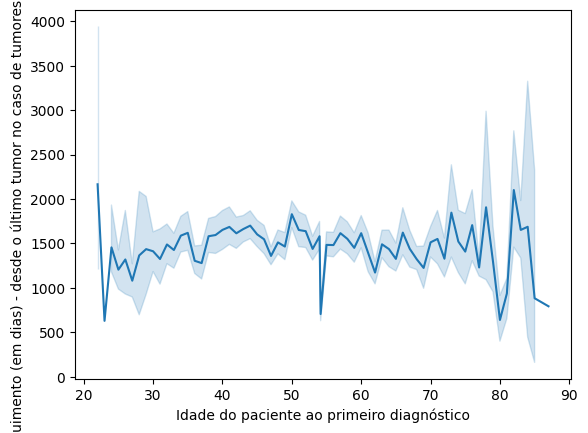

In [ ]:
#Gráfico gerado através do lineplot
sns.lineplot(data=tes2, x='Idade do paciente ao primeiro diagnóstico', y='Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]')



Nesse outro gráfico relacionamos a situação do paciente com sua idade e explicitamos o regime de tratamento utilizado de cada um

<Axes: xlabel='Última informação do paciente', ylabel='Idade do paciente ao primeiro diagnóstico'>

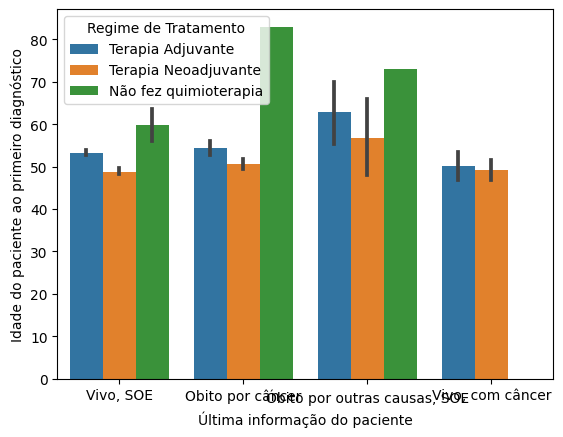

In [ ]:
#Gráfico gerado através do barplot

sns.barplot(data=tes2, x="Última informação do paciente", y="Idade do paciente ao primeiro diagnóstico", hue="Regime de Tratamento")

Por último, nesse gráfico tentamos enxergar a relação entre a lateralidade do tumor e o tempo desde o último tumor, e novamente tentamos explicitar qual foi o regime de tratamento utilizado

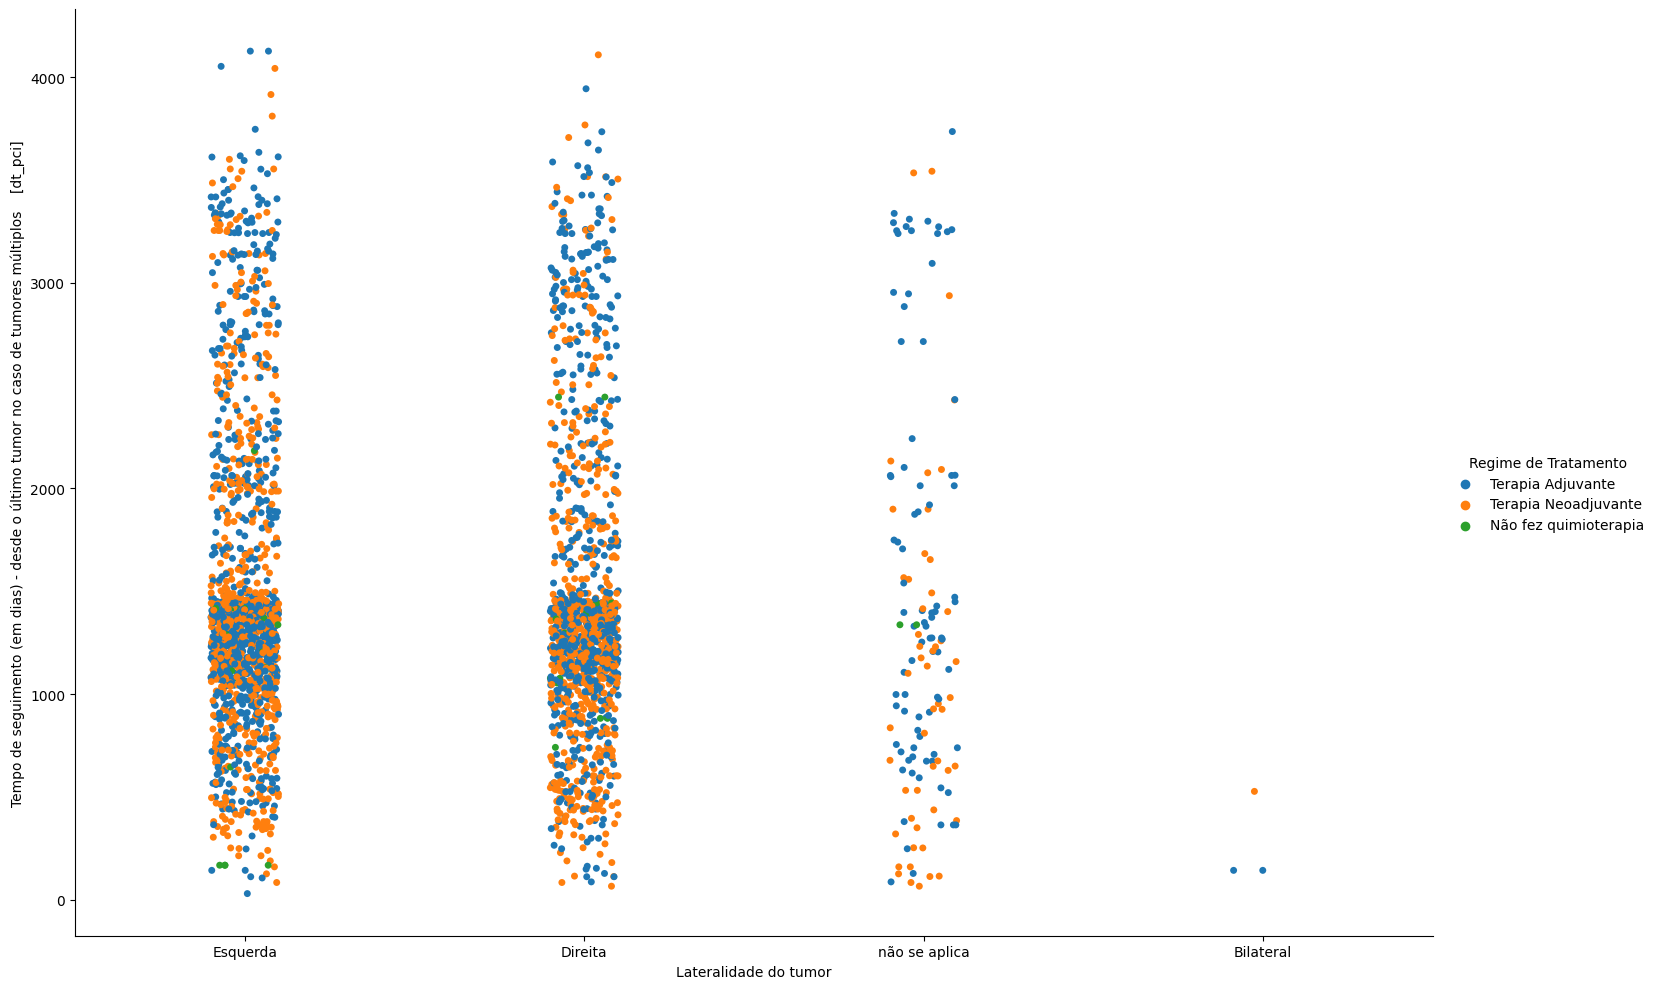

In [ ]:
#Gráfico gerado através do catplot


sns.catplot(data=tes2, x="Lateralidade do tumor", y="Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]", hue='Regime de Tratamento', aspect=10.7/7.3, height=10)

CODIFICAÇÃO IDADE (label) E ÚLTIMA INFORMAÇÃO (one-hot)

In [ ]:
#Setando casa decimais em 4

pd.set_option('display.precision',4)

#Transformando coluna em numerico

tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].astype('int64')

#Colocando mediana em valores vazios 

tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].replace(0, tes['Idade do paciente ao primeiro diagnóstico'].median())

#Scaler para normalizar os valores

scaler_norm = MinMaxScaler()

tes['Idade Normalizada'] = tes['Idade do paciente ao primeiro diagnóstico']

tes.isnull().sum()


<ipython-input-231-1ff10dac08af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].astype('int64')
<ipython-input-231-1ff10dac08af>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Idade do paciente ao primeiro diagnóstico'] = tes['Idade do paciente ao primeiro diagnóstico'].replace(0, tes['Idade do paciente ao primeiro diagnóstico'].median())
<ipython-input-231-1ff10dac08af>:17: SettingWithCopyWarning: 

Record ID                                                                                           0
Duração_do_Tratamento                                                                               0
Idade do paciente ao primeiro diagnóstico                                                           0
Receptor de progesterona                                                                          310
Receptor de estrogênio                                                                            311
Última informação do paciente                                                                       0
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]       0
Regime de Tratamento                                                                                0
Classificação TNM Clínico - M                                                                       0
Classificação TNM Clínico - N                                                     

In [ ]:
tes['Idade Normalizada']

1       58
6       43
10      29
16      51
29      39
        ..
4652    50
4653    50
4654    50
4655    50
4656    50
Name: Idade Normalizada, Length: 3102, dtype: int64

In [ ]:

# Adicionando as celulas vazias da coluna 'Última informação do paciente' o valor de 'Sem ultima informação'

tes['Última informação do paciente'].fillna("Sem ultima informação", inplace= True)

#Aplicação de lógica de OneHotEncoder para a coluna 'Última informação do paciente'
ohe = OneHotEncoder()

opa = ohe.fit_transform(tes['Última informação do paciente'].values.reshape(-1,1)).toarray()

# Criando um novo DataFrame que ira receber o OneHotEncoder com as seguintes colunas: (Vivo SOE, Obito por câncer,Vivo com câncer, Óbito por outras causas SOE)

dfohe = pd.DataFrame(opa, columns=['Vivo SOE', 'Obito por câncer','Vivo com câncer', 'Óbito por outras causas SOE'])

# Concatenando a Df 'tes' com o Df 'dfone'

df = pd.concat([tes,dfohe], axis=1)


<ipython-input-233-141ba1b9cb29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Última informação do paciente'].fillna("Sem ultima informação", inplace= True)


CODIFICAÇÃO TEMPO DE SEGUIMENTO (LABEL)

In [ ]:
df

,Record ID,Duração_do_Tratamento,Idade do paciente ao primeiro diagnóstico,Receptor de progesterona,Receptor de estrogênio,Última informação do paciente,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Regime de Tratamento,Classificação TNM Clínico - M,Classificação TNM Clínico - N,...,Data_do_tratamento,Intensidade do tumor,Tamanho do tumor,TNM T Intensidade,TNM T Tamanho,Idade Normalizada,Vivo SOE,Obito por câncer,Vivo com câncer,Óbito por outras causas SOE
1,710.0,3294.0,58.0,negativo,positivo,"Vivo, SOE",3294.0,Terapia Adjuvante,0,1,...,2008-05-29,3.0,1.0,NaN,NaN,58.0,1.0,0.0,0.0,0.0
6,1705.0,2224.0,43.0,negativo,negativo,Obito por câncer,2224.0,Terapia Adjuvante,0,1,...,2007-12-06,2.0,1.0,NaN,NaN,43.0,0.0,1.0,0.0,0.0
10,1960.0,699.0,29.0,negativo,negativo,"Vivo, SOE",699.0,Terapia Neoadjuvante,0,2,...,2009-01-30,3.0,1.0,NaN,NaN,29.0,1.0,0.0,0.0,0.0
16,2157.0,385.0,51.0,NaN,NaN,"Vivo, SOE",385.0,Terapia Adjuvante,0,0,...,2008-09-27,1.0,0.0,NaN,NaN,51.0,0.0,1.0,0.0,0.0
29,2864.0,4592.0,39.0,positivo,positivo,"Vivo, SOE",1839.0,Terapia Neoadjuvante,0,1,...,2010-01-21,2.0,2.0,NaN,NaN,39.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0


In [ ]:
#Fazendo label in code(Cria catecorias, ex: 1°, 2°, 3°) nas colunas 'Tempo ultimo tumor','Tempo_de_sobrevida' e 'Tempo_ate_recidiva'


df['Tempo ultimo tumor'] = pd.cut(df['Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]'], bins=[0,365,1095,1825,4000], labels=['1','2','3','4'])
df['Tempo_de_sobrevida'] = pd.cut(df['Duração_do_Tratamento'], bins=[0, 365, 1095, 1825, 4000], labels=['0 a 1 ano', '1 a 3 anos', '3 a 5 anos', '5+ anos'])

df['Tempo_ate_recidiva'] = df['Data de Recidiva'] - df['Data_do_tratamento']
df['Tempo_ate_recidiva'] = df['Tempo_ate_recidiva'].dt.days
df['Tempo_ate_recidiva'] = pd.cut(df['Tempo_ate_recidiva'], bins=[0, 365, 1095, 1825, 4000], labels=['0 a 1 ano', '1 a 3 anos', '3 a 5 anos', '5+ anos'])


# Lógica semelhante a anterior é aplicada nessa coluna, garantindo a codificação bem feita

pd.set_option('display.precision',4)

print(df.shape)

(4093, 32)


CODIFICAÇÃO "REGIME DE TRATAMENTO" (ONE-HOT)

In [ ]:
# Mesma Lógica anteriormente na codificação do OneHotEncoder é aplicada na coluna 'Regime de Tratamento'

df['Regime de Tratamento'].fillna("Não Informado Tratamento", inplace= True)

ohetrat = ohe.fit_transform(df['Regime de Tratamento'].values.reshape(-1,1)).toarray()

df_ohetrat = pd.DataFrame(ohetrat, columns=['Tratamento Não Informado','Terapia Adjuvante','Terapia Neoadjuvante'])

df = pd.concat([df,df_ohetrat], axis=1)


CODIFICAÇÃO SUBTIPO TUMORAL

In [ ]:
df['Subtipo tumoral'].value_counts()

2.0    1030
4.0     731
5.0     594
3.0     417
1.0     261
Name: Subtipo tumoral, dtype: int64

In [ ]:
# Mesma Lógica anteriormente na codificação do OneHotEncoder é aplicada na coluna 'Subtipo tumoral'

df['Subtipo tumoral'].fillna(0, inplace= True)
# df['Subtipo tumoral'].replace({0:}, inplace= True)

# ohesubtipo = ohe.fit_transform(df['Subtipo tumoral'].values.reshape(-1,1)).toarray()

# df_ohesubtipo = pd.DataFrame(ohesubtipo, columns=['Subtipo indefinido','Subtipo tumoral 1','Subtipo tumoral 2','Subtipo tumoral 3','Subtipo tumoral 4', 'Subtipo tumoral 5'])

# df = pd.concat([df,df_ohesubtipo], axis=1)

# df = df.drop('Subtipo indefinido', axis=1)


CODIFICAÇÃO "LATERALIDADE DO TUMOR"

In [ ]:
# Mesma Lógica anteriormente na codificação do OneHotEncoder é aplicada na coluna 'Lateralidade do tumor'

df['Lateralidade do tumor'].fillna("Não Informado Lateralidade", inplace= True)

ohelateral = ohe.fit_transform(df['Lateralidade do tumor'].values.reshape(-1,1)).toarray()

df_ohelat = pd.DataFrame(ohelateral, columns=['Bilateral','Direita','Esquerda','Lateralidade Não informada','Lateralidade não se aplica'])

df = pd.concat([df,df_ohelat], axis=1)


CODIFICAÇÃO DAS RECIDIVAS (BINARY)

In [ ]:
# Preenchendo as celulas vazias da coluna 'Com recidiva local' com "Não" e depois setando valores onde Não:0 e Sim:1
# e renomeando a coluna 'Com recidiva local' por 'Recidiva Local'

df['Com recidiva local'].fillna("Não", inplace= True)
df['Recidiva Local'] = df['Com recidiva local']
df["Recidiva Local"] = np.where(df["Com recidiva local"] == "Não", 0, 1)

# Preenchendo as celulas vazias da coluna 'Com recidiva Regional' com "Não" e depois setando valores onde Não:0 e Sim:1
# e renomeando a coluna 'Com recidiva Regional' por 'Recidiva Regional'

df['Com recidiva regional'].fillna("Não", inplace= True)
df['Recidiva Regional'] = df['Com recidiva regional']
df["Recidiva Regional"] = np.where(df["Com recidiva regional"] == "Não", 0, 1)

# Preenchendo as celulas vazias da coluna 'Com recidiva Distancia' com "Não" e depois setando valores onde Não:0 e Sim:1
# e renomeando a coluna 'Com recidiva Distancia' por 'Recidiva Distancia'

df['Com recidiva à distância'].fillna("Não", inplace= True)
df['Recidiva à distância'] = df['Com recidiva à distância']
df["Recidiva à distância"] = np.where(df["Com recidiva à distância"] == "Não", 0, 1)

# Preenchendo as celulas vazias da coluna 'Tempo_de_sobrevida' e 'Tempo_ate_recidiva' com "0 a 1 ano"

df['Tempo_de_sobrevida'].fillna('0 a 1 ano', inplace= True)

df['Tempo_ate_recidiva'].fillna('0 a 1 ano', inplace= True)

# Verificando os valores nulos no Dataframe 'df'

df.isnull().sum()

Record ID                                                                                        1438
Duração_do_Tratamento                                                                            1438
Idade do paciente ao primeiro diagnóstico                                                        1438
Receptor de progesterona                                                                         1748
Receptor de estrogênio                                                                           1749
Última informação do paciente                                                                    1438
Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]    1438
Regime de Tratamento                                                                              447
Classificação TNM Clínico - M                                                                    1438
Classificação TNM Clínico - N                                                     

CODIFICAÇÃO "ESTADIO CLINICO"

In [ ]:
# Dropando valores nulos da coluna 'Record ID'

df.dropna(subset=['Record ID'])

# Adicionando o valor "IV" nas celulas nulas (NaN) da coluna 'Estadio Clínico'

df['Estadio Clínico  '].fillna("IV", inplace= True)

# Transformando '0' (string) em '0' (int)

df['Estadio Clínico  '].replace({0:"0"}, inplace= True)



# Mesma Lógica anteriormente na codificação do OneHotEncoder é aplicada na coluna 'Estadio Clínico'

ohe_v1 =ohe.fit_transform(df['Estadio Clínico  '].values.reshape(-1,1)).toarray()

XoneCod = pd.DataFrame(ohe_v1, columns = ['Estadío 0', 'Estadío I', 'Estadío IA', 'Estadío IB','Estadío IB1','Estadío IB2','Estadío II', 'Estadío IIA', 'Estadío IIB','Estadío III' , 'Estadío IIIA', 'Estadío IIIB', 'Estadío IIIC',
       'Estadío IV','Estadío IVA','Estadío IVB', 'Estadío IVC' ,'Estadío Indeterminado', 'Estadío Indeterminado2'])


df=pd.concat([df,XoneCod], axis=1)
df.drop(columns=['Estadio Clínico  '], inplace=True)



CODIFICAÇÃO "CLASSIFICAÇÃO TMN CLÍNICO" (ONE-HOT)

In [ ]:
# Substituindo os valores que antes eram int64 por object e as celulas que são nulas 
#São substituidas por "zTNM T Vazio"

df['Classificação TNM Clínico - T'].replace({0:"0", 1:"1", 2:"2", 3:"3", 4:"4"}, inplace= True)
df['Classificação TNM Clínico - T'].fillna("zTNM T Vazio", inplace= True)

# OneHotEncoder da coluna 'Classificação TNM Clínico - T'

X4 =ohe.fit_transform(df['Classificação TNM Clínico - T'].values.reshape(-1,1)).toarray()

XoneC = pd.DataFrame(X4, columns = ['Class_TMN_T_0','Class_TMN_T_1', 'Class_TMN_T_1A', 'Class_TMN_T_1B','Class_TMN_T_1C', 'Class_TMN_T_2','Class_TMN_T_2A','Class_TMN_T_2B', 'Class_TMN_T_3','Class_TMN_T_3A','Class_TNM_T_3B', 'Class_TMN_T_4', 'Class_TMN_T_4A', 'Class_TMN_T_4B', 'Class_TMN_T_4C', 'Class_TMN_T_4D', 'Class_TMN_T_CDIS','Class_TMN_T_IS', 'Class_TMN_T_INDETERMINADO','Class_TMN_T_INDETERMINADO2','TNM T VAZIO'])

df=pd.concat([df,XoneC], axis=1)

# Dropando as colunas 'Classificação TNM Clínico - T' e 'TNM T VAZIO'

df.drop(columns=['Classificação TNM Clínico - T'], inplace=True)
df.drop(columns=['TNM T VAZIO'], inplace=True)


# OneHotEncoder da coluna 'Classificação TNM Clínico - N'

df['Classificação TNM Clínico - N'].replace({0:"0", 1:"1", 2:"2", 3:"3", 4:"4"}, inplace= True)
df['Classificação TNM Clínico - N'].fillna("zTNM N Vazio", inplace= True)

X5 =ohe.fit_transform(df['Classificação TNM Clínico - N'].values.reshape(-1,1)).toarray()

Xone = pd.DataFrame(X5, columns = ['Class_TMN_N_0', 'Class_TMN_N_1','Class_TMN_N_1B', 'Class_TMN_N_2', 'Class_TMN_N_2A', 'Class_TMN_N_2B', 'Class_TMN_N_3', 'Class_TMN_N_3A', 'Class_TMN_N_3B', 'Class_TMN_N_3C',
 'Class_TMN_N_INDETERMINADO','Class_TMN_N_INDETERMINADO2','TNM N VAZIO'])


df=pd.concat([df,Xone], axis=1)

# Dropando as colunas 'Classificação TNM Clínico - N' e 'TNM N VAZIO'

df.drop(columns=['Classificação TNM Clínico - N'], inplace=True)
df.drop(columns=['TNM N VAZIO'], inplace=True)


print(df.shape)

# Dropando qualquer linha que tenha valor nulo
df.dropna(how='all',axis=0, inplace=True)

print(df.shape)

(4654, 91)
(4654, 91)


CODIFICAÇÃO "COMBINAÇÃO DE TRATAMENTOS" (ONE HOT)

In [ ]:
# Preenchendo valores nulos(NaN) com 'Nenhum tratamento' na coluna 'Combinação dos Tratamentos Realizados no Hospital'

df['Combinação dos Tratamentos Realizados no Hospital'].fillna("Nenhum tratamento", inplace= True)


#Aqui eu pego a coluna 'Combinação dos Tratamentos Realizados no Hospital' e faço um One Hot Encoding, porem há tratamentos que se repetem
#nas mesmas linhas, então para resolver isso uso o split para separar as strings repetidas da celula 

splittest=df['Combinação dos Tratamentos Realizados no Hospital'] .str.split('+',expand=True)
t =splittest.rename(columns={0:'Cirurgia',1:'Radio',2:'Quimio',3:'Hormonio'})
t.insert(4,'Nenhum_Trantamento',np.nan)
t.insert(5,'Outras_combinacoes',np.nan)

#Aqui eu localizo a celula que está na coluna errada e mando ela para a coluna certa
#'Outras combinações'=='Outras combinações' 

t.loc[t['Cirurgia']=='Outras combinações','Outras_combinacoes'] = 'Outras_combinacoes'
t['Outras_combinacoes']=t['Outras_combinacoes'].fillna(0)

#Mesma logica aplicada acima.
t.loc[(t['Cirurgia']=='Quimioterapia')|(t['Cirurgia']=='Quimio'),'Quimio'] = 'Quimio'
t['Quimio']=t['Quimio'].fillna(0)

#Mesma logica aplicada acima.
t.loc[t['Cirurgia']=='Hormonio','Hormonio'] = 'Hormonio'

#Mesma logica aplicada acima.
t.loc[(t['Cirurgia']=='Radio')|(t['Cirurgia']=='Radioterapia'),'Radio'] = 'Radio'

#Mesma logica aplicada acima.
t.loc[(t['Cirurgia']=='Nenhum_Trantamento'),'Nenhum_Trantamento'] = 'Nenhum_Trantamento'

#Aqui eu substituo valores vazios por '0'
t['Nenhum_Trantamento']=t['Nenhum_Trantamento'].replace({np.nan:0})

t.loc[(t['Radio']==' Quimioterapia'),'Quimio'] = 'Quimio'

#Aqui eu transformo as variaveis(Cirurgia, Outras_combinacoes, Quimio, Hormonio, Radio, Cirurgia) em 0 e 1

t.loc[(t['Cirurgia']!='Cirurgia')&(t['Cirurgia']!=' Cirurgia')&(t['Cirurgia']!='Cirurgia ')&(t['Cirurgia']!=' Cirurgia '),'Cirurgia'] = 0
 
t['Outras_combinacoes']=t['Outras_combinacoes'].replace({'Outras_combinacoes':1})

t['Quimio']=t['Quimio'].replace({'Quimio':1,' Quimio ':1,' Quimio':1})

t['Hormonio']=t['Hormonio'].replace({None:0,' Hormonio':1})

t['Radio']=t['Radio'].replace({None:0,' Radio ':1,'Radio':1,'Radio ':1})

t.loc[(t['Radio']!=0)&(t['Radio']!=1),'Radio'] = 1

t['Radio']=t['Radio'].replace({' Quimioterapia':0,' Radioterapia':'Radio'})

t['Cirurgia']=t['Cirurgia'].replace({'Cirurgia':1,' Cirurgia':1,'Cirurgia ':1,' Cirurgia ':1})

t.loc[(t['Quimio']!=0)&(t['Quimio']!=1),'Quimio'] = 1

df=pd.concat([df,t], axis=1)

# Excluo a coluna 'Combinação dos Tratamentos Realizados no Hospital'

df.drop(columns=['Combinação dos Tratamentos Realizados no Hospital'], inplace=True)

df.head(10)

,Record ID,Duração_do_Tratamento,Idade do paciente ao primeiro diagnóstico,Receptor de progesterona,Receptor de estrogênio,Última informação do paciente,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Regime de Tratamento,Classificação TNM Clínico - M,Lateralidade do tumor,...,Class_TMN_N_3B,Class_TMN_N_3C,Class_TMN_N_INDETERMINADO,Class_TMN_N_INDETERMINADO2,Cirurgia,Radio,Quimio,Hormonio,Nenhum_Trantamento,Outras_combinacoes
1,710.0,3294.0,58.0,negativo,positivo,"Vivo, SOE",3294.0,Terapia Adjuvante,0,Esquerda,...,0.0,0.0,0.0,0.0,1,1,1,0,0,0
6,1705.0,2224.0,43.0,negativo,negativo,Obito por câncer,2224.0,Terapia Adjuvante,0,Direita,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0
10,1960.0,699.0,29.0,negativo,negativo,"Vivo, SOE",699.0,Terapia Neoadjuvante,0,Direita,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
16,2157.0,385.0,51.0,NaN,NaN,"Vivo, SOE",385.0,Terapia Adjuvante,0,Direita,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
29,2864.0,4592.0,39.0,positivo,positivo,"Vivo, SOE",1839.0,Terapia Neoadjuvante,0,Esquerda,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
30,2864.0,1839.0,39.0,positivo,positivo,"Vivo, SOE",1839.0,Terapia Neoadjuvante,0,Direita,...,0.0,0.0,0.0,0.0,1,1,1,1,0,0
32,3357.0,1428.0,48.0,NaN,NaN,"Vivo, SOE",1428.0,Terapia Adjuvante,0,não se aplica,...,0.0,0.0,0.0,0.0,1,1,1,1,0,0
35,3448.0,379.0,56.0,negativo,negativo,Obito por câncer,1558.0,Terapia Neoadjuvante,1,Esquerda,...,0.0,0.0,0.0,0.0,1,1,1,0,0,0
36,3448.0,1558.0,56.0,negativo,negativo,Obito por câncer,1558.0,Terapia Neoadjuvante,0,não se aplica,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
40,3536.0,2458.0,74.0,NaN,NaN,Obito por câncer,3299.0,Terapia Adjuvante,0,Esquerda,...,0.0,0.0,0.0,0.0,1,1,1,0,0,0


In [ ]:
df['Receptor de progesterona'].unique()

array(['negativo', nan, 'positivo', 'inconclusivo', 'não realizado'],
      dtype=object)

TRATAMENTO DAS COLUNAS DE RECEPTORES HORMONAIS

In [ ]:
df['Receptor de progesterona'].fillna('não realizado', inplace=True)
df['Receptor de progesterona'].replace({'negativo': -1, 'positivo': 1, 'inconclusivo': 0, 'não realizado': 0}, inplace=True)

In [ ]:
df['Receptor de progesterona'].value_counts()

 0    1881
 1    1582
-1    1191
Name: Receptor de progesterona, dtype: int64

In [ ]:
df['Receptor de estrogênio'].fillna('não realizado', inplace=True)
df['Receptor de estrogênio'].replace({'negativo': -1, 'positivo': 1, 'não realizado': 0}, inplace=True)

In [ ]:
df['Receptor de progesterona'].unique()

array([-1,  0,  1])

In [ ]:
df['Receptor de progesterona'].isnull().sum()

0

In [ ]:
df['Receptor de progesterona'].unique()

array([-1,  0,  1])

One Hot Encoding das colunas Progesterona e Estrogênio

In [ ]:
# ohe_v1 =ohe.fit_transform(df['Receptor de progesterona'].values.reshape(-1,1)).toarray()

# XoneCod = pd.DataFrame(ohe_v1, columns = ['Receptor de progesterona negativo', 'Receptor de progesterona não realizado', 'Receptor de progesterona positivo', 'Receptor de progesterona inconclusivo'])


# df=pd.concat([df,XoneCod], axis=1)
# df.drop(columns=['Receptor de progesterona'], inplace=True)

In [ ]:
# ohe_v1 =ohe.fit_transform(df['Receptor de estrogênio'].values.reshape(-1,1)).toarray()

# XoneCod = pd.DataFrame(ohe_v1, columns = ['Receptor de estrogênio negativo', 'Receptor de estrogênio não realizado', 'Receptor de estrogênio positivo'])


# df=pd.concat([df,XoneCod], axis=1)
# df.drop(columns=['Receptor de estrogênio'], inplace=True)

In [ ]:
df

,Record ID,Duração_do_Tratamento,Idade do paciente ao primeiro diagnóstico,Receptor de progesterona,Receptor de estrogênio,Última informação do paciente,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Regime de Tratamento,Classificação TNM Clínico - M,Lateralidade do tumor,...,Class_TMN_N_3B,Class_TMN_N_3C,Class_TMN_N_INDETERMINADO,Class_TMN_N_INDETERMINADO2,Cirurgia,Radio,Quimio,Hormonio,Nenhum_Trantamento,Outras_combinacoes
1,710.0,3294.0,58.0,-1,1,"Vivo, SOE",3294.0,Terapia Adjuvante,0,Esquerda,...,0.0,0.0,0.0,0.0,1,1,1,0,0,0
6,1705.0,2224.0,43.0,-1,-1,Obito por câncer,2224.0,Terapia Adjuvante,0,Direita,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0
10,1960.0,699.0,29.0,-1,-1,"Vivo, SOE",699.0,Terapia Neoadjuvante,0,Direita,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
16,2157.0,385.0,51.0,0,0,"Vivo, SOE",385.0,Terapia Adjuvante,0,Direita,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
29,2864.0,4592.0,39.0,1,1,"Vivo, SOE",1839.0,Terapia Neoadjuvante,0,Esquerda,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4628,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4630,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4638,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


# **Criando Target**

In [ ]:
# Crio um novo DataFrame('df_teste') onde adiciono uma nova coluna chamada "target" que contém os valores da coluna "Record ID" do DataFrame 'df'.

df_teste = df.assign(target = df['Record ID'])

print(df_teste['Última informação do paciente'].unique())

# Removo do DataFrame 'df_teste' as linhas em que a coluna "Última informação do paciente" é igual a "Óbito por outras causas, SOE".

df_teste = df_teste.drop(df[df['Última informação do paciente'] == 'Óbito por outras causas, SOE'].index)

# Removo do DataFrame 'df_teste' as linhas em que a coluna "Última informação do paciente" contém valores nulos (NaN). 

df_teste = df_teste.drop(df[df['Última informação do paciente'].isnull()].index)



['Vivo, SOE' 'Obito por câncer' 'Óbito por outras causas, SOE'
 'Vivo, com câncer' nan]


In [ ]:
# função que localiza o index da 'Última informação do paciente' e se ele estiver vivo e com cancer
# ele localiza de esse paciente (index) tem alguma recidiva e retorna 0;
# se ele não tem recidiva e continua vivo, retorna 1
# se ele não tem recidiva e está morto, retorna 0

lista_i = df_teste.index

def funcao_target(df, i):
  if(df.loc[i, 'Última informação do paciente'] == 'Vivo, com câncer'):
    if (df.loc[i, 'Recidiva Local'] == 1 or df.loc[i, 'Recidiva Regional'] == 1 or df.loc[i, 'Recidiva à distância'] == 1):
      return 0
    else:
      return 1
  elif(df.loc[i, 'Última informação do paciente'] == 'Vivo, SOE'):
    return 1

  elif(df.loc[i, 'Última informação do paciente'] == 'Obito por câncer'):
    return 0


In [ ]:
#Dropando da coluna 'Intensidade do tumor' os valores nulos.

df_teste.dropna(subset=['Intensidade do tumor'],inplace=True)

In [ ]:
#Olhando as informações do DataFrame

df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3021 entries, 1 to 4656
Data columns (total 97 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Record ID                                                                                      3021 non-null   float64       
 1   Duração_do_Tratamento                                                                          3021 non-null   float64       
 2   Idade do paciente ao primeiro diagnóstico                                                      3021 non-null   float64       
 3   Receptor de progesterona                                                                       3021 non-null   int64         
 4   Receptor de estrogênio                                                                         3021 no

In [ ]:
#Olhando as colunas do DataFrame

df_teste.columns

Index(['Record ID', 'Duração_do_Tratamento',
       'Idade do paciente ao primeiro diagnóstico', 'Receptor de progesterona',
       'Receptor de estrogênio', 'Última informação do paciente',
       'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]',
       'Regime de Tratamento', 'Classificação TNM Clínico - M',
       'Lateralidade do tumor', 'Com recidiva à distância',
       'Com recidiva regional', 'Com recidiva local', 'Subtipo tumoral',
       'Data de Recidiva', 'Data_do_tratamento', 'Intensidade do tumor',
       'Tamanho do tumor', 'TNM T Intensidade', 'TNM T Tamanho',
       'Idade Normalizada', 'Vivo SOE', 'Obito por câncer', 'Vivo com câncer',
       'Óbito por outras causas SOE', 'Tempo ultimo tumor',
       'Tempo_de_sobrevida', 'Tempo_ate_recidiva', 'Tratamento Não Informado',
       'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Bilateral', 'Direita',
       'Esquerda', 'Lateralidade Não informada', 'Lateralidade não se aplica

In [ ]:
# Verificando as quantidades de quantos pacientes estão 'Vivo, SOE','Vivo, com câncer' e 'Obito por câncer' do Dataframe

counts = df_teste['Última informação do paciente'].value_counts()
print(counts)

Vivo, SOE           2251
Obito por câncer     636
Vivo, com câncer     134
Name: Última informação do paciente, dtype: int64


In [ ]:
def logica_target(df,i):
  #info iniciais 
  info_iniciais_subtipo = 0.15
  if (df.loc[i, 'Tamanho do tumor'] == 1):
    info_iniciais_subtipo *= 0.1
  elif (df.loc[i,'Tamanho do tumor'] == 2):
    info_iniciais_subtipo *= 0.3
  elif (df.loc[i,'Tamanho do tumor'] == 3):
    info_iniciais_subtipo *= 0.6
  elif (df.loc[i,'Tamanho do tumor'] == 4):
    info_iniciais_subtipo *= 1
  elif(df.loc[i, 'Tamanho do tumor'] == 0):
    info_iniciais_subtipo *= 0.01


#calculando o fator de intensidade para a gravidade do tumor da paciente
  info_iniciais_intensidade = 0.15
  if (df.loc[i,'Intensidade do tumor'] == 1):
    info_iniciais_intensidade *= 0.1
  elif (df.loc[i,'Intensidade do tumor'] == 2):
    info_iniciais_intensidade *= 0.3
  elif (df.loc[i,'Intensidade do tumor'] == 3):
    info_iniciais_intensidade *= 0.6
  elif (df.loc[i,'Intensidade do tumor'] == 4):
    info_iniciais_intensidade *= 1
  elif(df.loc[i, 'Intensidade do tumor'] == 0):
    info_iniciais_subtipo *= 0.01



  gravidade = info_iniciais_subtipo + info_iniciais_intensidade



#calculando o fator final para mensurar o sucesso ou insucesso dependendo do estado atual e/ou recidiva e/ou tempo de sobrevida 
  ultima_info_paciente = 1
  if (df.loc[i,'Última informação do paciente'] == "Vivo, SOE"):
    return 1
  elif (df.loc[i,'Última informação do paciente'] == "Vivo, com câncer"):
    vivo_com_cancer = -0.6
    if (df.loc[i,'Recidiva Local'] == 1):
      recidiva_local = 0.4
      if(df.loc[i,'Tempo_ate_recidiva'] == '0 a 1 ano'):
        recidiva_local *= 1
      elif(df.loc[i,'Tempo_ate_recidiva'] == '1 a 3 anos'):
        recidiva_local *= 0.6
      elif(df.loc[i,'Tempo_ate_recidiva'] == '3 a 5 anos'):
        recidiva_local *= 0.2
      elif(df.loc[i,'Tempo_ate_recidiva'] == '5+ anos'):
        recidiva_local *= 0.05
      vivo_com_cancer *= recidiva_local


    elif(df.loc[i,'Recidiva Regional'] == 1):
      recidiva_regional = 0.7
      if(df.loc[i,'Tempo_ate_recidiva'] == '0 a 1 ano'):
        recidiva_regional *= 1
      elif(df.loc[i,'Tempo_ate_recidiva'] == '1 a 3 anos'):
        recidiva_regional *= 0.6
      elif(df.loc[i,'Tempo_ate_recidiva'] == '3 a 5 anos'):
        recidiva_regional *= 0.2
      elif(df.loc[i,'Tempo_ate_recidiva'] == '5+ anos'):
        recidiva_regional *= 0.05
      vivo_com_cancer *= recidiva_regional


    
    elif(df.loc[i,'Recidiva à distância'] == 1):
      recidiva_a_distancia = 0.9
      if(df.loc[i,'Tempo_ate_recidiva'] == '0 a 1 ano'):
        recidiva_a_distancia *= 1
      elif(df.loc[i,'Tempo_ate_recidiva'] == '1 a 3 anos'):
        recidiva_a_distancia *= 0.6
      elif(df.loc[i,'Tempo_ate_recidiva'] == '3 a 5 anos'):
        recidiva_a_distancia *= 0.2
      elif(df.loc[i, 'Tempo_ate_recidiva'] == '5+ anos'):
        recidiva_a_distancia *= 0.05

      vivo_com_cancer *= recidiva_a_distancia
      ultima_info_paciente *= vivo_com_cancer

  elif (df.loc[i, 'Última informação do paciente'] == 'Obito por câncer'):
    morto_por_cancer = -0.75
    if(df.loc[i, 'Tempo_de_sobrevida'] == '0 a 1 ano'):
        morto_por_cancer *= 1
    elif(df.loc[i, 'Tempo_de_sobrevida'] == '1 a 3 anos'):
        morto_por_cancer *= 0.8
    elif(df.loc[i, 'Tempo_de_sobrevida'] == '3 a 5 anos'):
        morto_por_cancer *= 0.5
    elif(df.loc[i, 'Tempo_de_sobrevida'] == '5+ anos'):
        morto_por_cancer *= 0.1
    
    ultima_info_paciente *= morto_por_cancer

  score = gravidade + ultima_info_paciente

  if score > 0:
    return 1
  else: 
    return 0

In [ ]:
#Para cada linha do DataFrame, o target recebe o valor da função a cima

lista_i = df_teste.index

for i in lista_i:
  df_teste.loc[i, 'target'] = logica_target(df_teste, i)

In [ ]:
# Verificando se há algum valor nulo no target

print(df_teste['target'].isnull().sum())

0


In [ ]:
#Remove do DataFrame df_teste as linhas em que as colunas 'Tempo ultimo tumor' e 'Vivo SOE' que contém valores nulos (NaN).

df_teste.drop(df_teste.loc[df_teste['Tempo ultimo tumor'].isnull()].index, inplace=True)
df_teste.drop(df_teste.loc[df_teste['Vivo SOE'].isnull()].index, inplace=True)

In [ ]:
# Código teste para verificar a existência de missings

lista_c = df_teste.columns

for i in lista_c:
  print(i)
  print(df_teste[i].isnull().sum())
  print("\n\n")


Record ID
0



Duração_do_Tratamento
0



Idade do paciente ao primeiro diagnóstico
0



Receptor de progesterona
0



Receptor de estrogênio
0



Última informação do paciente
0



Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]
0



Regime de Tratamento
0



Classificação TNM Clínico - M
0



Lateralidade do tumor
0



Com recidiva à distância
0



Com recidiva regional
0



Com recidiva local
0



Subtipo tumoral
0



Data de Recidiva
1580



Data_do_tratamento
11



Intensidade do tumor
0



Tamanho do tumor
0



TNM T Intensidade
1488



TNM T Tamanho
1488



Idade Normalizada
0



Vivo SOE
0



Obito por câncer
0



Vivo com câncer
0



Óbito por outras causas SOE
0



Tempo ultimo tumor
0



Tempo_de_sobrevida
0



Tempo_ate_recidiva
0



Tratamento Não Informado
0



Terapia Adjuvante
0



Terapia Neoadjuvante
0



Bilateral
0



Direita
0



Esquerda
0



Lateralidade Não informada
0



Lateralidade não se aplica
0



Recidiva Loca

In [ ]:
# Cria-se um novo DataFrame que apenas contem as linhas onde a 'Terapia Adjuvante' e 'Terapia neoAdjuvante' seja igual a 1


new_df_teste = df_teste.loc[(df_teste['Terapia Adjuvante'] == 1) | (df_teste['Terapia Neoadjuvante'] == 1)]


# Cria-se um novo DataFrame com as colunas de interesse para o modelo

new_df_teste2 = new_df_teste[[
 'Idade Normalizada',
 'Bilateral',
 'Direita',
 'Esquerda',
 'Lateralidade Não informada',
 'Lateralidade não se aplica',
 'Tamanho do tumor',
 'Intensidade do tumor',
 'Subtipo tumoral',
 'target'
]]

# **Separando teste e treino**

In [ ]:
# Cria-se um Dataframe(df_adjuvante) que recebe apenas as linhas em que 'Terapia Adjuvante' seja 1
# Cria-se um Dataframe(df_neoadjuvante) que recebe apenas as linhas em que 'Terapia Neoadjuvante' seja 1

df_adjuvante = new_df_teste2.loc[(df_teste['Terapia Adjuvante'] == 1)]
df_neoadjuvante = new_df_teste2.loc[(df_teste['Terapia Neoadjuvante'] == 1)]


# Pegamos os DataFrames que criamos acima e separamos em novos DataFrames
# onde os que começão com 'x' não tem a coluna target e as com 'y' contém apenas o target

x_adjuvante = df_adjuvante.drop(columns='target')
y_adjuvante = df_adjuvante['target']
# x_adjuvante["Tempo ultimo tumor"]=x_adjuvante["Tempo ultimo tumor"].astype('int64')

x_neoadjuvante = df_neoadjuvante.drop(columns='target')
y_neoadjuvante = df_neoadjuvante['target']
# x_neoadjuvante["Tempo ultimo tumor"]=x_neoadjuvante["Tempo ultimo tumor"].astype('int64')


# Utilizando o RandomOverSampler para pegar amostras minoritarias do nosso Dataset (X/y neo/adjuvante),
# gerando amostras sintéticas aleatoriamente e igualando-as aos números de amostras das classes majoritárias.

ros = SMOTE(random_state=1)

x_adjuvante, y_adjuvante = ros.fit_resample(x_adjuvante.squeeze(), y_adjuvante.squeeze())

x_neoadjuvante, y_neoadjuvante = ros.fit_resample(x_neoadjuvante.squeeze(), y_neoadjuvante.squeeze())

In [ ]:
#KNN

# Pegamos os DataFrames que criamos acima e separamos em novos DataFrames
# onde os que começão com 'x' não tem a coluna target e as com 'y' contém apenas o target
# aplicando a mesma logica acima porém com knn, rf e svm quem são os modelos de predição


#ADJUVANTE

x_knn_adjuvante = x_adjuvante
y_knn_adjuvante = y_adjuvante

#Separando o modelo em treino e teste

x_treino_knn_adjuvante, x_teste_knn_adjuvante, y_treino_knn_adjuvante, y_teste_knn_adjuvante = train_test_split(x_knn_adjuvante, y_knn_adjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)



#NEOADJUVANTE

x_knn_neoadjuvante = x_neoadjuvante
y_knn_neoadjuvante = y_neoadjuvante

#Separando o modelo em treino e teste

x_treino_knn_neoadjuvante, x_teste_knn_neoadjuvante, y_treino_knn_neoadjuvante, y_teste_knn_neoadjuvante = train_test_split(x_knn_neoadjuvante, y_knn_neoadjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)

#SVM

#ADJUVANTE

x_svm_adjuvante = x_adjuvante
y_svm_adjuvante = y_adjuvante

#Separando o modelo em treino e teste

x_treino_svm_adjuvante, x_teste_svm_adjuvante, y_treino_svm_adjuvante, y_teste_svm_adjuvante = train_test_split(x_svm_adjuvante, y_svm_adjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)


#NEOADJUVANTE

x_svm_neoadjuvante = x_neoadjuvante
y_svm_neoadjuvante = y_neoadjuvante

#Separando o modelo em treino e teste

x_treino_svm_neoadjuvante, x_teste_svm_neoadjuvante, y_treino_svm_neoadjuvante, y_teste_svm_neoadjuvante = train_test_split(x_svm_neoadjuvante, y_svm_neoadjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)


#ADJUVANTE

x_rf_adjuvante = x_adjuvante
y_rf_adjuvante = y_adjuvante

#Separando o modelo em treino e teste

x_treino_rf_adjuvante, x_teste_rf_adjuvante, y_treino_rf_adjuvante, y_teste_rf_adjuvante = train_test_split(x_rf_adjuvante, y_rf_adjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)

#NEOADJUVANTE

x_rf_neoadjuvante = x_neoadjuvante
y_rf_neoadjuvante = y_neoadjuvante

#Separando o modelo em treino e teste

x_treino_rf_neoadjuvante, x_teste_rf_neoadjuvante, y_treino_rf_neoadjuvante, y_teste_rf_neoadjuvante = train_test_split(x_rf_neoadjuvante, y_rf_neoadjuvante,
                                                                                                                test_size=0.2,
                                                                                                                random_state=1)






In [ ]:
# Aqui pegamos os x's tanto de treino como o de teste de cada modelo e normalizamos.

scaler_norm = MinMaxScaler()

x_treino_knn_adjuvante= scaler_norm.fit_transform(x_treino_knn_adjuvante)
x_teste_knn_adjuvante= scaler_norm.fit_transform(x_teste_knn_adjuvante)


x_treino_knn_neoadjuvante= scaler_norm.fit_transform(x_treino_knn_neoadjuvante)
x_teste_knn_neoadjuvante= scaler_norm.fit_transform(x_teste_knn_neoadjuvante)


x_treino_svm_adjuvante= scaler_norm.fit_transform(x_treino_svm_adjuvante)
x_teste_svm_adjuvante= scaler_norm.fit_transform(x_teste_svm_adjuvante)


x_treino_svm_neoadjuvante= scaler_norm.fit_transform(x_treino_svm_neoadjuvante)
x_teste_svm_neoadjuvante= scaler_norm.fit_transform(x_teste_svm_neoadjuvante)


x_treino_rf_adjuvante= scaler_norm.fit_transform(x_treino_rf_adjuvante)
x_teste_rf_adjuvante= scaler_norm.fit_transform(x_teste_rf_adjuvante)


x_treino_rf_neoadjuvante= scaler_norm.fit_transform(x_treino_rf_neoadjuvante)
x_teste_rf_neoadjuvante= scaler_norm.fit_transform(x_teste_rf_neoadjuvante)

##Lógica para criar um array com o peso de cada amostra

In [ ]:
# Atribuindo o modelo Rf a variavel 'modelo_adjuvante' e depois é utilizada o '.fit'
#para treinar o modelo de aprendizado com dados de entrada x_adjuvante e saída esperada y_adjuvante

modelo_adjuvante = RandomForestClassifier(n_estimators=10)
modelo_adjuvante.fit(x_adjuvante, y_adjuvante)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Atribuindo o modelo Rf a variavel 'modelo_neoadjuvante' e depois é utilizada o '.fit'
#para treinar o modelo de aprendizado com dados de entrada x_neoadjuvante e saída esperada y_neoadjuvante

modelo_neoadjuvante = RandomForestClassifier(n_estimators=10)
modelo_neoadjuvante.fit(x_neoadjuvante, y_neoadjuvante)

RandomForestClassifier(n_estimators=10)

In [ ]:
#feature_importances_ para encontrar a relação de cada coluna com o modelo

lista = new_df_teste2.columns
lista_i = modelo_adjuvante.feature_importances_

for i in range(0, len(lista)-1):
  print(lista[i])
  print(lista_i[i])
  print("\n\n")

Idade Normalizada
0.32458691168959575



Bilateral
0.00019964594478873962



Direita
0.07276734194154699



Esquerda
0.05103872233411268



Lateralidade Não informada
0.0



Lateralidade não se aplica
0.010033229111987127



Tamanho do tumor
0.15631879207653515



Intensidade do tumor
0.22054694232923505



Subtipo tumoral
0.16450841457219856





In [ ]:
#feature_importances_ para encontrar a relação de cada coluna com o modelo

lista = new_df_teste2.columns
lista_i = modelo_neoadjuvante.feature_importances_

for i in range(0, len(lista)-1):
  print(lista[i])
  print(lista_i[i])
  print("\n\n")

Idade Normalizada
0.2935699626354291



Bilateral
0.0006769763006327662



Direita
0.06399676802007627



Esquerda
0.05591238304200019



Lateralidade Não informada
0.0



Lateralidade não se aplica
0.008768287951067783



Tamanho do tumor
0.15168397487349985



Intensidade do tumor
0.269883904186771



Subtipo tumoral
0.15550774299052303





#**Método KNN**

###**Método KNN Adjuvante**

In [ ]:

knn = KNeighborsClassifier(n_neighbors=6)

# o modelo é ajustado aos dados de treinamento x_knn_adjuvante e y_knn_adjuvante usando o método fit().

knn.fit(x_knn_adjuvante, y_knn_adjuvante)

# Agora geramos previsões para o conjunto de treinamento usando o método predict()
# e armazenadas na variável y_pred_knn_adjuvante.

y_pred_knn_adjuvante = knn.predict(x_knn_adjuvante)

#Por fim geramos previsões para o conjunto de teste x_knn_adjuvante, 
#as previsões são armazenadas na variável y_pred_knn_adjuvante.

y_pred_knn_adjuvante = knn.predict(x_knn_adjuvante)


# Printamos a acuracia do modelo

print('Acc teste: ', knn.score(x_knn_adjuvante, y_knn_adjuvante ))
print(classification_report(y_knn_adjuvante, y_pred_knn_adjuvante))

Acc treino:  0.8466666666666667
Acc teste:  0.742603550295858
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       164
         1.0       0.79      0.68      0.73       174

    accuracy                           0.74       338
   macro avg       0.75      0.74      0.74       338
weighted avg       0.75      0.74      0.74       338



<Axes: >

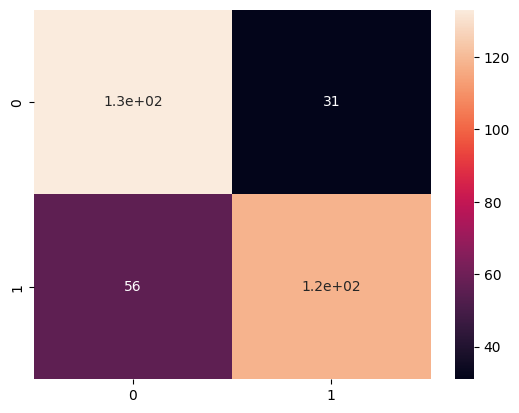

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_teste_knn_adjuvante,y_pred_knn_adjuvante)
sns.heatmap(matriz1,annot=True)

###**KNN adjuvante com RandomSearch**

In [ ]:
#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_random_knn={
    'n_neighbors':[5,10,15,19,25],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40,50],
    'p':[1,2],
    'metric':['euclidean','manhattan','minkowski','chebyshev','mahalanobis'],

}

knn_random_adjuvante=GridSearchCV(knn,param_random_knn,scoring="f1",return_train_score=True,verbose=True,n_jobs=-1)
knn_random_adjuvante.fit(x_treino_knn_neoadjuvante,y_treino_knn_neoadjuvante)

In [ ]:
# Printa o melhor estimador

knn_random_adjuvante.best_estimador_

In [ ]:
# Printa os melhores parametros

knn_random_adjuvante.best_params_

In [ ]:
# Validando o modelo com o melhor hiperparametro de acordo com o Random/Grid Search

knn_random_adjuvante=KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=10, p=1,
                     weights='distance')

# o modelo é ajustado aos dados de treinamento x_knn_adjuvante e y_knn_adjuvante usando o método fit().

knn_random_adjuvante.fit(x_knn_adjuvante,y_knn_adjuvante)

# Agora geramos previsões para o conjunto de treinamento usando o método predict()
# e armazenadas na variável y_pred_knn_adjuvante.

y_pred_knn_random_adjuvante = knn_random_adjuvante.predict(x_knn_adjuvante)

#Por fim geramos previsões para o conjunto de teste x_knn_adjuvante, 
#as previsões são armazenadas na variável y_pred_knn_adjuvante.

y_pred_knn_random_adjuvante = knn_random_adjuvante.predict(x_knn_adjuvante)


# Printamos a acuracia do modelo

print('Acc teste: ', knn_random_adjuvante.score(x_knn_adjuvante, y_knn_adjuvante ))
print(classification_report(y_knn_adjuvante, y_pred_knn_random_adjuvante))

Acc treino:  0.9740740740740741
Acc teste:  0.7781065088757396
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       164
         1.0       0.76      0.82      0.79       174

    accuracy                           0.78       338
   macro avg       0.78      0.78      0.78       338
weighted avg       0.78      0.78      0.78       338



<Axes: >

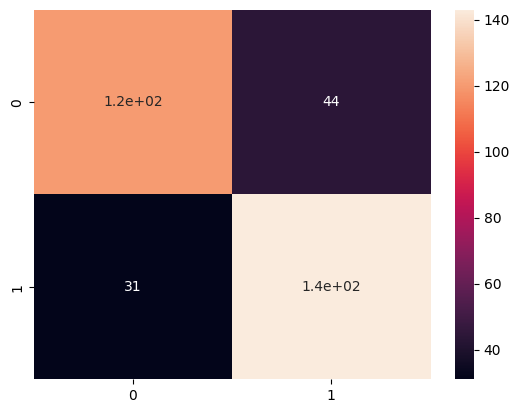

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_knn_adjuvante,y_pred_knn_random_adjuvante)
sns.heatmap(matriz1,annot=True)

###**Método KNN Neoadjuvante**

In [ ]:

knn = KNeighborsClassifier(n_neighbors=6)

# o modelo é ajustado aos dados de treinamento x_knn_neoadjuvante e y_knn_neoadjuvante usando o método fit().
knn.fit(x_knn_neoadjuvante, y_knn_neoadjuvante)

# Agora geramos previsões para o conjunto de treinamento usando o método predict()
# e armazenadas na variável y_pred_knn_neoadjuvante.

y_pred_knn_neoadjuvante = knn.predict(x_knn_neoadjuvante)

#Por fim geramos previsões para o conjunto de teste x_knn_neoadjuvante, 
#as previsões são armazenadas na variável y_pred_knn_neoadjuvante.

y_pred_knn_neoadjuvante = knn.predict(x_knn_neoadjuvante)


# Printamos a acuracia do modelo

print('Acc teste: ', knn.score(x_knn_neoadjuvante, y_knn_neoadjuvante ))
print(classification_report(y_knn_neoadjuvante, y_pred_knn_neoadjuvante))

Acc treino:  0.8569206842923794
Acc teste:  0.7639751552795031
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       169
         1.0       0.77      0.73      0.74       153

    accuracy                           0.76       322
   macro avg       0.76      0.76      0.76       322
weighted avg       0.76      0.76      0.76       322



<Axes: >

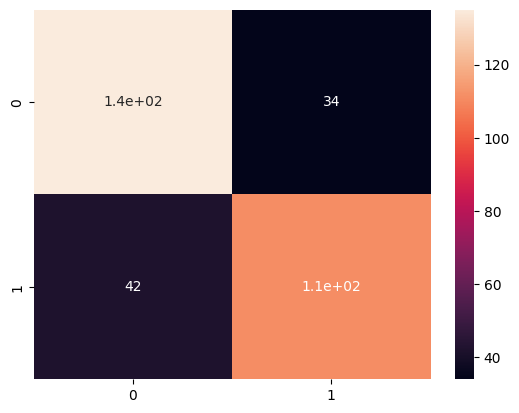

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_knn_neoadjuvante,y_pred_knn_neoadjuvante)
sns.heatmap(matriz1,annot=True)

###**Random Search knn Neoadjuvante**

In [ ]:
#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_grid_knn={
    'n_neighbors':[5,6,10,15,19],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40,50],
    'p':[1,2],
    'metric':['euclidean','manhattan','minkowski','chebyshev','mahalanobis'],

}



knn_random_neoadjuvante=GridSearchCV(knn,param_grid_knn,scoring="f1",return_train_score=True,verbose=True,n_jobs=-1)

knn_random_neoadjuvante.fit(x_treino_knn_neoadjuvante,y_treino_knn_neoadjuvante)

In [ ]:
# Printa os melhores parametros

knn_random_neoadjuvante.best_estimator_

In [ ]:
# Printa os melhores parametros

knn_random_neoadjuvante.best_params_

In [ ]:
# Validando o modelo com o melhor hiperparametro de acordo com o Random/Grid Search

knn_random_neoadjuvante=KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=6, p=1,
                     weights='distance')
# o modelo é ajustado aos dados de treinamento x_knn_neoadjuvante e y_knn_neoadjuvante usando o método fit().

knn_random_neoadjuvante.fit(x_knn_neoadjuvante,y_knn_neoadjuvante)

# Agora geramos previsões para o conjunto de treinamento usando o método predict()
# e armazenadas na variável y_pred_knn_random_neoadjuvante.

y_pred_knn_random_neoadjuvante = knn_random_neoadjuvante.predict(x_knn_neoadjuvante)

#Por fim geramos previsões para o conjunto de teste x_knn_neoadjuvante, 
#as previsões são armazenadas na variável y_pred_knn_random_neoadjuvante.

y_pred_knn_random_neoadjuvante = knn_random_neoadjuvante.predict(x_knn_neoadjuvante)


# Printamos a acuracia do modelo

print('Acc teste: ', knn_random_neoadjuvante.score(x_knn_neoadjuvante, y_knn_neoadjuvante ))
print(classification_report(y_knn_neoadjuvante, y_pred_knn_random_neoadjuvante))

Acc treino:  0.9805598755832037
Acc teste:  0.7732919254658385
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77       169
         1.0       0.73      0.83      0.78       153

    accuracy                           0.77       322
   macro avg       0.78      0.78      0.77       322
weighted avg       0.78      0.77      0.77       322



<Axes: >

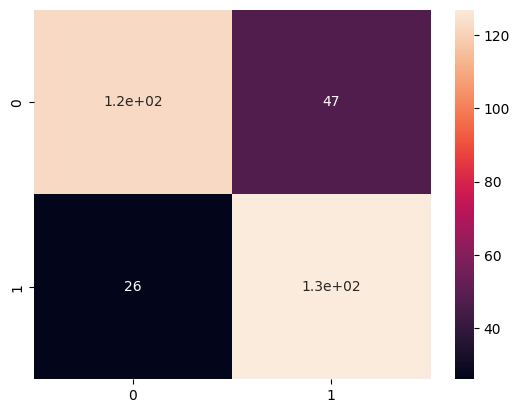

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_knn_neoadjuvante,y_pred_knn_random_neoadjuvante)
sns.heatmap(matriz1,annot=True)

#**Método Random Forest**

###**Método Random Forest Adjuvante**

In [ ]:
rf = RandomForestClassifier(max_depth = 7, random_state=1)

# O método fit() é usado para treinar o modelo com as variáveis 'x_rf_adjuvante', 'y_rf_adjuvante'.

rf.fit(x_rf_adjuvante, y_rf_adjuvante)

# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_rf_adjuvante.
# O resultado dessa previsão é armazenado na variável y_pred_rf_adjuvante.

y_pred_rf_adjuvante = rf.predict(x_rf_adjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_pred_rf_adjuvante.

y_pred_rf_adjuvante = rf.predict(x_rf_adjuvante)


# Printando a Acuracia do modelo

print( rf.score(x_rf_adjuvante, y_rf_adjuvante) )
print(classification_report(y_rf_adjuvante, y_pred_rf_adjuvante))

0.8773696682464455
0.8773696682464455
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       844
         1.0       0.85      0.92      0.88       844

    accuracy                           0.88      1688
   macro avg       0.88      0.88      0.88      1688
weighted avg       0.88      0.88      0.88      1688



<Axes: >

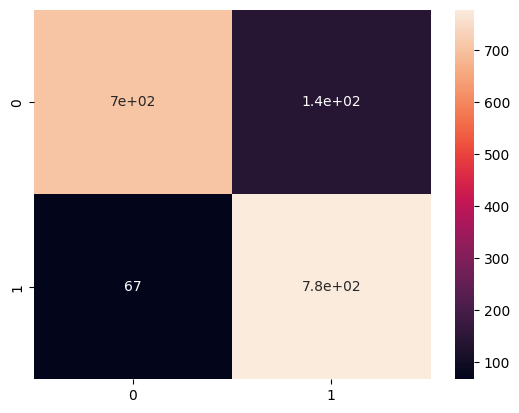

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_rf_adjuvante,y_pred_rf_adjuvante)
sns.heatmap(matriz1,annot=True)

###**Random Forest Adjuvante com RandomSearch**

In [ ]:
#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_random_rf={
    'n_estimators':[7,10,15,25,40,100,200,300,400,500],'criterion':["gini","entropy"],'max_depth':[10,30,50,70,100],'min_samples_split':[10,20,30,40,50,60],'min_samples_leaf':[2,5,10],'max_features':[10,30,50]
}
rf_tt=RandomForestClassifier()


rf_random_adjuvante=RandomizedSearchCV(rf_tt,param_random_rf,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

rf_random_adjuvante.fit(x_treino_rf_adjuvante, y_treino_rf_adjuvante)

In [ ]:
# Printa os melhores parametros

rf_random_adjuvante.best_params_

In [ ]:
# Printa o melhor estimador

rf_random_adjuvante.best_estimator_

In [ ]:
# Validando o modelo com o melhor hiperparametro de acordo com o Random/Grid Search

rf_random_adjuvante_f = RandomForestClassifier(criterion='entropy', max_depth=50, max_features=30,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=40)

# O método fit() é usado para treinar o modelo com as variáveis 'x_rf_adjuvante', 'y_rf_adjuvante'.

rf_random_adjuvante_f.fit(x_rf_adjuvante,y_rf_adjuvante)

# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_rf_adjuvante.
# O resultado dessa previsão é armazenado na variável y_pred_rf_random_adjuvante.

y_pred_rf_random_adjuvante = rf_random_adjuvante_f.predict(x_rf_adjuvante)

#Por fim geramos previsões para o conjunto de teste x_rf_adjuvante, 
#as previsões são armazenadas na variável y_pred_rf_random_adjuvante.

y_pred_rf_random_adjuvante = rf_random_adjuvante_f.predict(x_rf_adjuvante)


# Printamos a acuracia do modelo

print('Acc teste: ', rf_random_adjuvante_f.score(x_rf_adjuvante, y_rf_adjuvante ))
print(classification_report(y_rf_adjuvante, y_pred_rf_random_adjuvante))

Acc teste:  0.9235781990521327
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       844
         1.0       0.90      0.96      0.93       844

    accuracy                           0.92      1688
   macro avg       0.93      0.92      0.92      1688
weighted avg       0.93      0.92      0.92      1688



<Axes: >

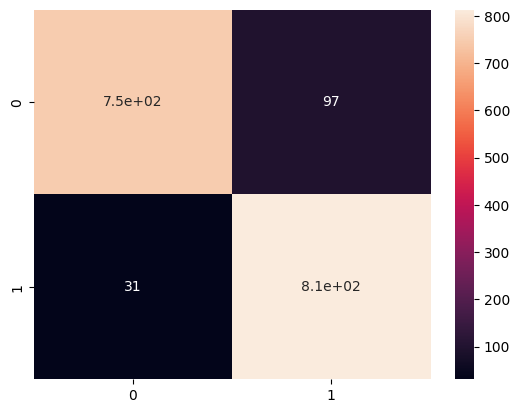

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_rf_adjuvante,y_pred_rf_random_adjuvante)
sns.heatmap(matriz1,annot=True)

###**Método Random Forest Neoadjuvante**

In [ ]:
rf_neo = RandomForestClassifier(max_depth = 7, random_state=40)

# O método fit() é usado para treinar o modelo com as variáveis 'x_rf_neoadjuvante', 'y_rf_neoadjuvante'.

rf_neo.fit(x_rf_neoadjuvante, y_rf_neoadjuvante)

# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_rf_neoadjuvante.
# O resultado dessa previsão é armazenado na variável y_pred_rf_neoadjuvante.

y_pred_rf_neoadjuvante = rf.predict(x_rf_neoadjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_rf_neoadjuvante. O resultado dessa previsão é armazenado na variável y_pred_rf_neoadjuvante.

y_pred_rf_neoadjuvante = rf.predict(x_rf_neoadjuvante)


# Printando a Acuracia do modelo


print( rf_neo.score(x_rf_neoadjuvante, y_rf_neoadjuvante) )
print(classification_report(y_rf_neoadjuvante, y_pred_rf_neoadjuvante))

0.8843283582089553
0.8843283582089553
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       804
         1.0       0.81      0.87      0.84       804

    accuracy                           0.84      1608
   macro avg       0.84      0.84      0.83      1608
weighted avg       0.84      0.84      0.83      1608



<Axes: >

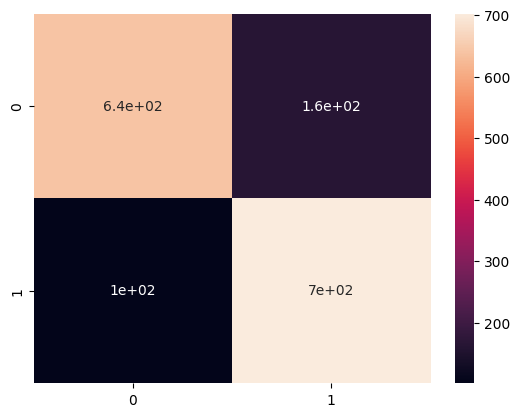

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_rf_neoadjuvante,y_pred_rf_neoadjuvante)
sns.heatmap(matriz1,annot=True)

###**Random Forest Neoadjuvante com RandomSearch**

In [ ]:
#Setamos alguns valores para os hiperparametros para que o RandomSearch teste-os

param_grid_rf={
    'n_estimators':[7,10,15,25,40,100,200,300,400,500],'criterion':["gini","entropy"],'max_depth':[10,30,50,70,100],'min_samples_split':[10,20,30,40,50,60],'min_samples_leaf':[2,5,10],'max_features':[10,30,50]
}
rf_tt=RandomForestClassifier()


rf_random_neoadjuvante=RandomizedSearchCV(rf_tt,param_grid_rf,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

rf_random_neoadjuvante.fit(x_treino_rf_neoadjuvante, y_treino_rf_neoadjuvante)

In [ ]:
# Printa o melhor estimador

rf_random_neoadjuvante.best_estimator_

In [ ]:
# Printa os melhores parametros

rf_random_neoadjuvante.best_params_

In [ ]:
# Validando o modelo com o melhor hiperparametro de acordo com o Random/Grid Search

rf_random_neoadjuvante_f =RandomForestClassifier(criterion='entropy', max_depth=50, max_features=50,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=7)

# O método fit() é usado para treinar o modelo com as variáveis 'x_rf_neoadjuvante', 'y_rf_neoadjuvante'.

rf_random_neoadjuvante_f.fit(x_rf_neoadjuvante,y_rf_neoadjuvante)

# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_rf_neoadjuvante.
# O resultado dessa previsão é armazenado na variável y_pred_rf_random_neoadjuvante.

y_pred_rf_random_neoadjuvante = rf_random_neoadjuvante_f.predict(x_rf_neoadjuvante)

#Por fim geramos previsões para o conjunto de teste x_rf_neoadjuvante, 
#as previsões são armazenadas na variável y_pred_rf_random_neoadjuvante.

y_pred_rf_random_neoadjuvante = rf_random_neoadjuvante_f.predict(x_rf_neoadjuvante)


# Printamos a acuracia do modelo

print('Acc teste: ', rf_random_neoadjuvante_f.score(x_rf_neoadjuvante, y_rf_neoadjuvante ))
print(classification_report(y_rf_neoadjuvante, y_pred_rf_random_neoadjuvante))

Acc teste:  0.9148009950248757
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91       804
         1.0       0.88      0.96      0.92       804

    accuracy                           0.91      1608
   macro avg       0.92      0.91      0.91      1608
weighted avg       0.92      0.91      0.91      1608



<Axes: >

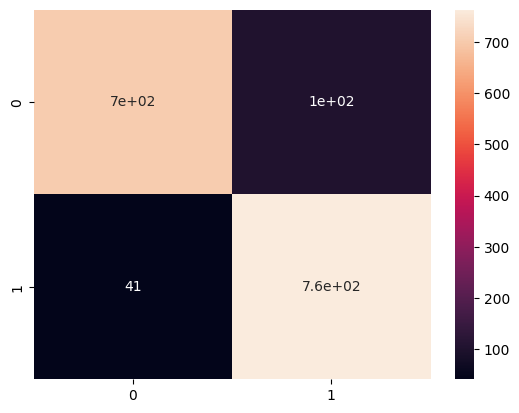

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_rf_neoadjuvante,y_pred_rf_random_neoadjuvante)
sns.heatmap(matriz1,annot=True)

In [ ]:
import joblib

joblib.dump(rf_random_adjuvante_f, 'modelo1.pkl')
joblib.dump(rf_random_neoadjuvante_f, 'modeloadjuvante.pkl')


['modeloadjuvante.pkl']

#**Método SVM**

###**Método SVM Adjuvante**

In [ ]:
clf=svm.SVC(C=1.0,kernel='rbf')

# ----------------------------------------------


# O método fit() é usado para treinar o modelo com as variáveis 'x_svm_adjuvante', 'y_svm_adjuvante'.
clf.fit(x_svm_adjuvante,y_svm_adjuvante)

# ----------------------------------------------


# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_svm_adjuvante.
# O resultado dessa previsão é armazenado na variável y_svm_adjuvante.
y_pred_svm_adjuvante=clf.predict(x_svm_adjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_svm_adjuvante.
y_pred_svm_adjuvante=clf.predict(x_svm_adjuvante)


# ----------------------------------------------

# Printando a Acuracia do modelo

print(clf.score(x_svm_adjuvante,y_svm_adjuvante))
print(classification_report(y_svm_adjuvante, y_pred_svm_adjuvante))

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_svm_adjuvante,y_pred_svm_adjuvante)
sns.heatmap(matriz1,annot=True)

###SVM ADJUVANTE GRIDSEARCH

In [ ]:
#Setamos alguns valores para os hiperparametros para que o GridSeach teste-os

param_grid_svm={
    'C':[1,2,3,4,5,6],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'pré-computado'],'gamma':['scale', 'auto']}


svm_tt=svm.SVC(C=1.0)



svm_grid=GridSearchCV(svm_tt,param_grid_svm,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

svm_grid.fit(x_treino_svm_adjuvante, y_treino_svm_adjuvante)




In [ ]:
# Printa os melhores parametros

svm_grid.best_params_

In [ ]:
# Printa o melhor estimador

svm_grid.best_estimator_

In [ ]:
# Validando o modelo com o melhor hiperparametro de acordo com o Random/Grid Search


clf_grid=svm.SVC(C=6, kernel='poly')

# ----------------------------------------------


# O método fit() é usado para treinar o modelo com as variáveis 'x_svm_adjuvante', 'y_svm_adjuvante'.
clf_grid.fit(x_svm_adjuvante,y_svm_adjuvante)

# ----------------------------------------------


# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_svm_adjuvante.
# O resultado dessa previsão é armazenado na variável y_svm_adjuvante.
y_pred_svm_adjuvante=clf_grid.predict(x_svm_adjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_pred_svm_grid_adjuvante.
y_pred_svm_grid_adjuvante=clf_grid.predict(x_svm_adjuvante)


# ----------------------------------------------

# Printando a Acuracia do modelo

print(clf_grid.score(x_svm_adjuvante,y_svm_adjuvante))
print(classification_report(y_svm_adjuvante, y_pred_svm_grid_adjuvante))

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_svm_adjuvante,y_pred_svm_grid_adjuvante)
sns.heatmap(matriz1,annot=True)

###**Método SVM Neoadjuvante**

In [ ]:
clf=svm.SVC(C=1.0,kernel='rbf')

# ----------------------------------------------


# O método fit() é usado para treinar o modelo com as variáveis 'x_svm_neoadjuvante', 'y_svm_neoadjuvante'.
clf.fit(x_svm_neoadjuvante,y_svm_neoadjuvante)

# ----------------------------------------------


# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_svm_neoadjuvante.
# O resultado dessa previsão é armazenado na variável y_svm_neoadjuvante.
y_pred=clf.predict(x_svm_neoadjuvante)

#Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
#de teste x_rf_adjuvante. O resultado dessa previsão é armazenado na variável y_svm_neoadjuvante.
y_pred_svm_neoadjuvante=clf.predict(x_svm_neoadjuvante)


# ----------------------------------------------

# Printando a Acuracia do modelo

print(clf.score(x_svm_neoadjuvante,y_svm_neoadjuvante))
print(classification_report(y_svm_neoadjuvante, y_pred_svm_neoadjuvante))

In [ ]:
# Matriz de confusão

matriz1=confusion_matrix(y_svm_neoadjuvante,y_pred_svm_neoadjuvante)
sns.heatmap(matriz1,annot=True)

###**Grid Search SVM Neoadjuvante**

In [ ]:
#Setamos alguns valores para os hiperparametros para que o GridSeach teste-os

param_grid_svm={
    'C':[1,2,3,4,5,6],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'pré-computado'],'gamma':['scale', 'auto']}


svm_tt=svm.SVC(C=1.0)



svm_grid_neoadjuvante=GridSearchCV(svm_tt,param_grid_svm,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)

svm_grid_neoadjuvante.fit(x_treino_svm_neoadjuvante, y_treino_svm_neoadjuvante)



In [ ]:
# Printa os melhores parametros

svm_grid_neoadjuvante.best_params_

In [ ]:
# Printa o melhor estimador

svm_grid_neoadjuvante.best_estimator_

In [ ]:
# Validando o modelo com o melhor hiperparametro de acordo com o Random/Grid Search

svm_grid_neoadjuvante = svm.SVC(C=2, kernel='poly')

# O método fit() é usado para treinar o modelo com as variáveis 'x_svm_neoadjuvante', 'y_svm_neoadjuvante'.


svm_grid_neoadjuvante.fit(x_svm_neoadjuvante,y_svm_neoadjuvante)
# Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_svm_neoadjuvante.
# O resultado dessa previsão é armazenado na variável 'y_pred_svm_random_neoadjuvante'.

y_pred_svm_random_neoadjuvante = svm_grid_neoadjuvante.predict(x_svm_neoadjuvante)

#Por fim geramos previsões para o conjunto de teste x_svm_neoadjuvante, 
#as previsões são armazenadas na variável 'y_pred_svm_grid_neoadjuvante'.

y_pred_svm_grid_neoadjuvante = svm_grid_neoadjuvante.predict(x_svm_neoadjuvante)


# Printamos a acuracia do modelo

print('Acc teste: ', svm_grid_neoadjuvante.score(x_svm_neoadjuvante, y_svm_neoadjuvante ))
print(classification_report(y_svm_neoadjuvante, y_pred_svm_grid_neoadjuvante))

In [ ]:
# Matriz de confusão

matriz2=confusion_matrix(y_svm_neoadjuvante,y_pred_svm_grid_neoadjuvante)
sns.heatmap(matriz2,annot=True)

#Tentativa de criar gráfico mostrando o quanto nosso modelo poderia ter sido útil na prática

In [ ]:
df_adjuvante_insucesso = (df_adjuvante.loc[df_adjuvante['target'] == 0])
df_adjuvante_insucesso['target']

In [ ]:
df_adjuvante_insucesso.columns

In [ ]:
df_neoadjuvante_insucesso = (df_neoadjuvante.loc[df_neoadjuvante['target'] == 0])
df_neoadjuvante_insucesso['target']

In [ ]:
df_neoadjuvante_insucesso.columns


In [ ]:
# df_neoadjuvante_insucesso.drop(columns=['target'], inplace=True)

In [ ]:
# from sklearn.metrics import classification_report 
# from sklearn.ensemble import RandomForestClassifier

# x_neoadjuvante_insucesso = df_neoadjuvante_insucesso.drop(columns='target')
# y_neoadjuvante_insucesso = df_neoadjuvante_insucesso['target']

# print(x_neoadjuvante_insucesso.columns)

# rf = RandomForestClassifier(max_depth = 7)

# # O método fit() é usado para treinar o modelo com as variáveis 'x_treino_rf_neoadjuvante', 'y_treino_rf_neoadjuvante'.

# rf.fit(x_treino_rf_adjuvante, y_treino_rf_adjuvante)
# rf.fit_transform(x_neoadjuvante_insucesso, y_neoadjuvante_insuceso)

# # Fazendo a previsão com o modelo treinado anteriormente usando o conjunto de treinamento x_treino_rf_neoadjuvante.
# # O resultado dessa previsão é armazenado na variável y_pred_treino_rf_neoadjuvante.

# y_pred_rf_adjuvante = rf.predict(x_treino_rf_adjuvante)

# #Fazemos a previsão com o modelo treinado anteriormente, mas agora usando o conjunto 
# #de teste x_teste_rf_neoadjuvante. O resultado dessa previsão é armazenado na variável y_pred_rf_neoadjuvante.

# y_pred_df_neoadjuvante_insucesso = rf.predict(x_neoadjuvante_insucesso)

# # Printando a Acuracia do modelo
# print( rf.score(x_treino_rf_neoadjuvante, y_treino_rf_neoadjuvante))
# print(y_pred_rf_adjuvante)
# # print( rf.score(x_teste_rf_neoadjuvante, y_teste_rf_neoadjuvante) )
# # print(classification_report(y_teste_knn_neoadjuvante, y_pred_knn_neoadjuvante))